In [178]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.manifold import TSNE
from umap import UMAP
from sklearn.preprocessing import (
    MaxAbsScaler,
    MinMaxScaler,
    Normalizer,
    PowerTransformer,
    QuantileTransformer,
    RobustScaler,
    StandardScaler,
    minmax_scale,
)

In [179]:
names = ['Class', 'Age', 'Sex', 'Steroid', 'Antivirals', 'Fatigue', 'Malaise', 'Anorexia', 'Liver Big','Liver Firm','Spleen Palpable','Spiders','Ascites','Varices','Bilirubin','Alk Phosphate','Sgot','Albumin','Protime','Histology']
hepatitis = pd.read_csv(r'D:\Artem\Magistrature\1_sem\intellg_systems_and_techno\labs\lab_3_4\datasets\hepatitis\hepatitis.data', header = None, names = names)
hepatitis.keys()     

Index(['Class', 'Age', 'Sex', 'Steroid', 'Antivirals', 'Fatigue', 'Malaise',
       'Anorexia', 'Liver Big', 'Liver Firm', 'Spleen Palpable', 'Spiders',
       'Ascites', 'Varices', 'Bilirubin', 'Alk Phosphate', 'Sgot', 'Albumin',
       'Protime', 'Histology'],
      dtype='object')

In [180]:
hepatitis



,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver Big,Liver Firm,Spleen Palpable,Spiders,Ascites,Varices,Bilirubin,Alk Phosphate,Sgot,Albumin,Protime,Histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46,1,2,2,1,1,1,2,2,2,1,1,1,7.60,?,242,3.3,50,2
151,2,44,1,2,2,1,2,2,2,1,2,2,2,2,0.90,126,142,4.3,?,2
152,2,61,1,1,2,1,1,2,1,1,2,1,2,2,0.80,75,20,4.1,?,2
153,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.50,81,19,4.1,48,2


1. Class: DIE, LIVE - Класс
2. AGE: 10, 20, 30, 40, 50, 60, 70, 80 - Возраст
3. SEX: male, female - Пол
4. STEROID: no, yes - Стероидный препарат
5. ANTIVIRALS: no, yes - Противовирусные препараты
6. FATIGUE: no, yes - Усталость
7. MALAISE: no, yes - Недомогание
8. ANOREXIA: no, yes - Анорексия
9. LIVER BIG: no, yes - Большая печень
10. LIVER FIRM: no, yes - Твёрдая печень
11. SPLEEN PALPABLE: no, yes - Пальпирующаяся селезёнка
12. SPIDERS: no, yes - Пауки
13. ASCITES: no, yes -  Асцит
14. VARICES: no, yes - Варикозное расширение вен
15. BILIRUBIN: 0.39, 0.80, 1.20, 2.00, 3.00, 4.00 - Билирубин (желчный пигмент)
16. ALK PHOSPHATE: 33, 80, 120, 160, 200, 250 - Щелочная фосфатаза
17. SGOT: 13, 100, 200, 300, 400, 500,  -  глутамат-оксалоацетат-трансаминаза(фермент)
18. ALBUMIN: 2.1, 3.0, 3.8, 4.5, 5.0, 6.0 - Альбумин (белок)
19. PROTIME: 10, 20, 30, 40, 50, 60, 70, 80, 90  - биологически активная добавка
20. HISTOLOGY: no, yes - Гистологическое исследование печени

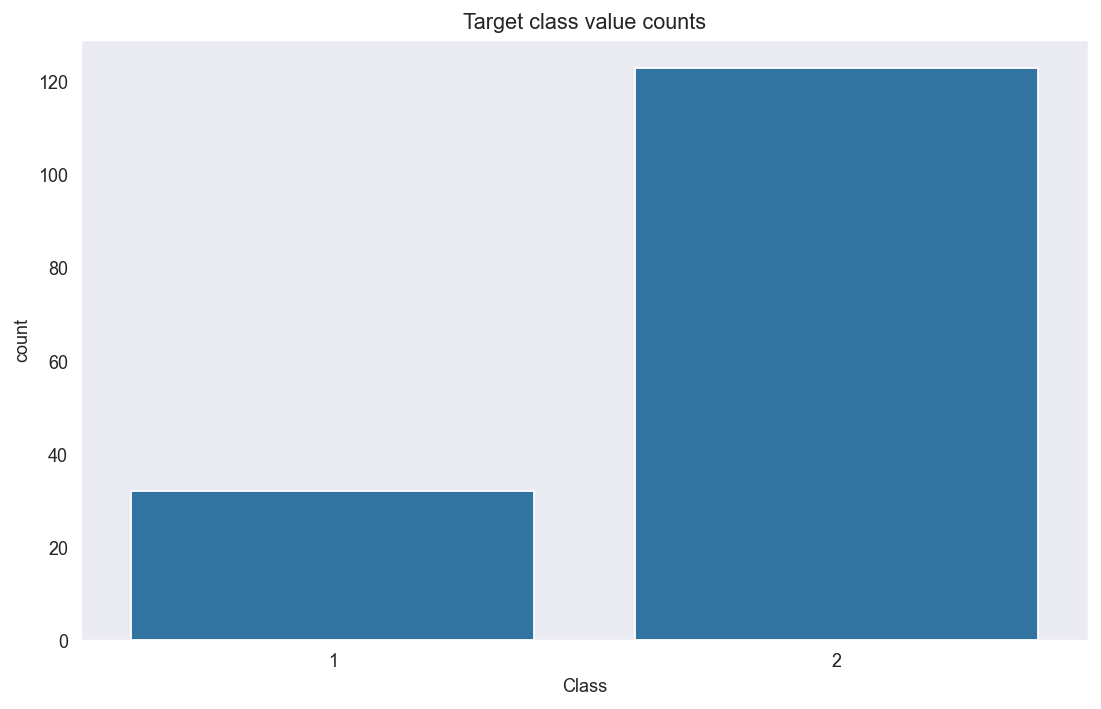

Class
2    123
1     32
Name: count, dtype: int64


In [181]:
plt.figure(figsize=(10, 6), dpi=130)
plt.grid()
sns.countplot(x=hepatitis['Class'])
plt.title("Target class value counts")
plt.show()
print(hepatitis['Class'].value_counts())

In [182]:
hepatitis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Class            155 non-null    int64 
 1   Age              155 non-null    int64 
 2   Sex              155 non-null    int64 
 3   Steroid          155 non-null    object
 4   Antivirals       155 non-null    int64 
 5   Fatigue          155 non-null    object
 6   Malaise          155 non-null    object
 7   Anorexia         155 non-null    object
 8   Liver Big        155 non-null    object
 9   Liver Firm       155 non-null    object
 10  Spleen Palpable  155 non-null    object
 11  Spiders          155 non-null    object
 12  Ascites          155 non-null    object
 13  Varices          155 non-null    object
 14  Bilirubin        155 non-null    object
 15  Alk Phosphate    155 non-null    object
 16  Sgot             155 non-null    object
 17  Albumin          155 non-null    ob

In [183]:
hepatitis.describe()

,Class,Age,Sex,Antivirals,Histology
count,155.000000,155.000000,155.000000,155.000000,155.000000
mean,1.793548,41.200000,1.103226,1.845161,1.451613
std,0.406070,12.565878,0.305240,0.362923,0.499266
min,1.000000,7.000000,1.000000,1.000000,1.000000
25%,2.000000,32.000000,1.000000,2.000000,1.000000
50%,2.000000,39.000000,1.000000,2.000000,1.000000
75%,2.000000,50.000000,1.000000,2.000000,2.000000
max,2.000000,78.000000,2.000000,2.000000,2.000000


Замена пропущенных значений их средними

In [184]:
Bilirubin = hepatitis['Bilirubin']
bilirubin_mean = round(Bilirubin[Bilirubin != '?'].astype(float).mean(),2)
print('Bilirubin mean = ',bilirubin_mean)

Alk_Phosphate = hepatitis['Alk Phosphate']
Alk_Phosphate_mean = Alk_Phosphate[Alk_Phosphate != '?'].astype(int).mean().astype(int)
print('Alk_Phosphate mean = ', Alk_Phosphate_mean)

Sgot = hepatitis['Sgot']
Sgot_mean = Sgot[Sgot != '?'].astype(int).mean().astype(int)
print('Sgot mean = ',Sgot_mean)

Albumin = hepatitis['Albumin']
Albumin_mean = round(Albumin[Albumin != '?'].astype(float).mean(),1)
print('Albumin mean = ',Albumin_mean)

Protime = hepatitis['Protime']
Protime_mean = Protime[Protime != '?'].astype(int).mean().astype(int)
print('Protime mean = ',Protime_mean)

hepatitis = hepatitis.replace({'Steroid' : {'?': 3}, 'Fatigue' : {'?': 3}, 'Malaise' : {'?': 3},  'Anorexia' : {'?': 3}, 'Liver Big' : {'?': 3}, 'Liver Firm' : {'?': 3}, 'Spleen Palpable' : {'?': 3}, 'Spiders' : {'?': 3},  'Ascites' : {'?': 3}, 'Varices' : {'?': 3}, 'Bilirubin' : {'?': bilirubin_mean},  'Alk Phosphate' : {'?': Alk_Phosphate_mean}, 'Sgot' : {'?': Sgot_mean},  'Albumin' : {'?': Albumin_mean}, 'Protime' : {'?': Protime_mean}})
hepatitis

Bilirubin mean =  1.43
Alk_Phosphate mean =  105
Sgot mean =  85
Albumin mean =  3.8
Protime mean =  61


,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver Big,Liver Firm,Spleen Palpable,Spiders,Ascites,Varices,Bilirubin,Alk Phosphate,Sgot,Albumin,Protime,Histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,61,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,61,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,61,1
3,2,31,1,3,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,105,200,4.0,61,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46,1,2,2,1,1,1,2,2,2,1,1,1,7.60,105,242,3.3,50,2
151,2,44,1,2,2,1,2,2,2,1,2,2,2,2,0.90,126,142,4.3,61,2
152,2,61,1,1,2,1,1,2,1,1,2,1,2,2,0.80,75,20,4.1,61,2
153,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.50,81,19,4.1,48,2


In [185]:
for column in hepatitis.columns:
    if column not in ['Bilirubin', 'Albumin']:
        hepatitis[column] = hepatitis[column].astype('int')
    else:
        hepatitis[column] = hepatitis[column].astype('float')
hepatitis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Class            155 non-null    int64  
 1   Age              155 non-null    int64  
 2   Sex              155 non-null    int64  
 3   Steroid          155 non-null    int64  
 4   Antivirals       155 non-null    int64  
 5   Fatigue          155 non-null    int64  
 6   Malaise          155 non-null    int64  
 7   Anorexia         155 non-null    int64  
 8   Liver Big        155 non-null    int64  
 9   Liver Firm       155 non-null    int64  
 10  Spleen Palpable  155 non-null    int64  
 11  Spiders          155 non-null    int64  
 12  Ascites          155 non-null    int64  
 13  Varices          155 non-null    int64  
 14  Bilirubin        155 non-null    float64
 15  Alk Phosphate    155 non-null    int64  
 16  Sgot             155 non-null    int64  
 17  Albumin         

In [186]:
hepatitis

,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver Big,Liver Firm,Spleen Palpable,Spiders,Ascites,Varices,Bilirubin,Alk Phosphate,Sgot,Albumin,Protime,Histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,61,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,61,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,61,1
3,2,31,1,3,1,2,2,2,2,2,2,2,2,2,0.7,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,105,200,4.0,61,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46,1,2,2,1,1,1,2,2,2,1,1,1,7.6,105,242,3.3,50,2
151,2,44,1,2,2,1,2,2,2,1,2,2,2,2,0.9,126,142,4.3,61,2
152,2,61,1,1,2,1,1,2,1,1,2,1,2,2,0.8,75,20,4.1,61,2
153,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.5,81,19,4.1,48,2


In [187]:
hepatitis_features = hepatitis.iloc[:, 1:]
hepatitis_targets = hepatitis.iloc[:, 0]

In [188]:
hepatitis_targets

0      2
1      2
2      2
3      2
4      2
      ..
150    1
151    2
152    2
153    2
154    1
Name: Class, Length: 155, dtype: int64

## Запустим алгоритм TSNE с различными вариантами параметрами и масштабирования данных

In [189]:
# функция для визуализациии результатов работы алгоритма TSNE с различными параметрами
def plot_tsne(X, title, tsne_kwargs, save=False, save_name="tsne"):
    # tsne = TSNE(n_components=2, learning_rate='auto',
    #             init='pca', perplexity=12, method='barnes_hut')
    tsne = TSNE(**tsne_kwargs)
    X_tsne = tsne.fit_transform(X)
    print(
        f"Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data {tsne.kl_divergence_}")
    tsne_data = np.vstack((X_tsne.T, hepatitis_targets)).T
    tsne_df = pd.DataFrame(data=tsne_data,columns=("Dim_1","Dim_2","label"))
    plt.figure(figsize=(20, 20))
    sns.FacetGrid(tsne_df,hue="label",height=10).map(plt.scatter,"Dim_1","Dim_2").add_legend()
    
    # plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=hepatitis_targets)
    # sns.scatterplot(X_tsne,)
    # plt.axis("equal")
    # plt.ylabel("Axis y")
    # plt.xlabel("Axis x")
    # plt.legend(title="Class")
    # plt.title(title)
    # plt.grid()
    if save:
        plt.savefig(fname=f'images/{save_name}.png', dpi=300,
                    format='png',  bbox_inches='tight')
    plt.show()

Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data 0.5578480362892151


<Figure size 2000x2000 with 0 Axes>

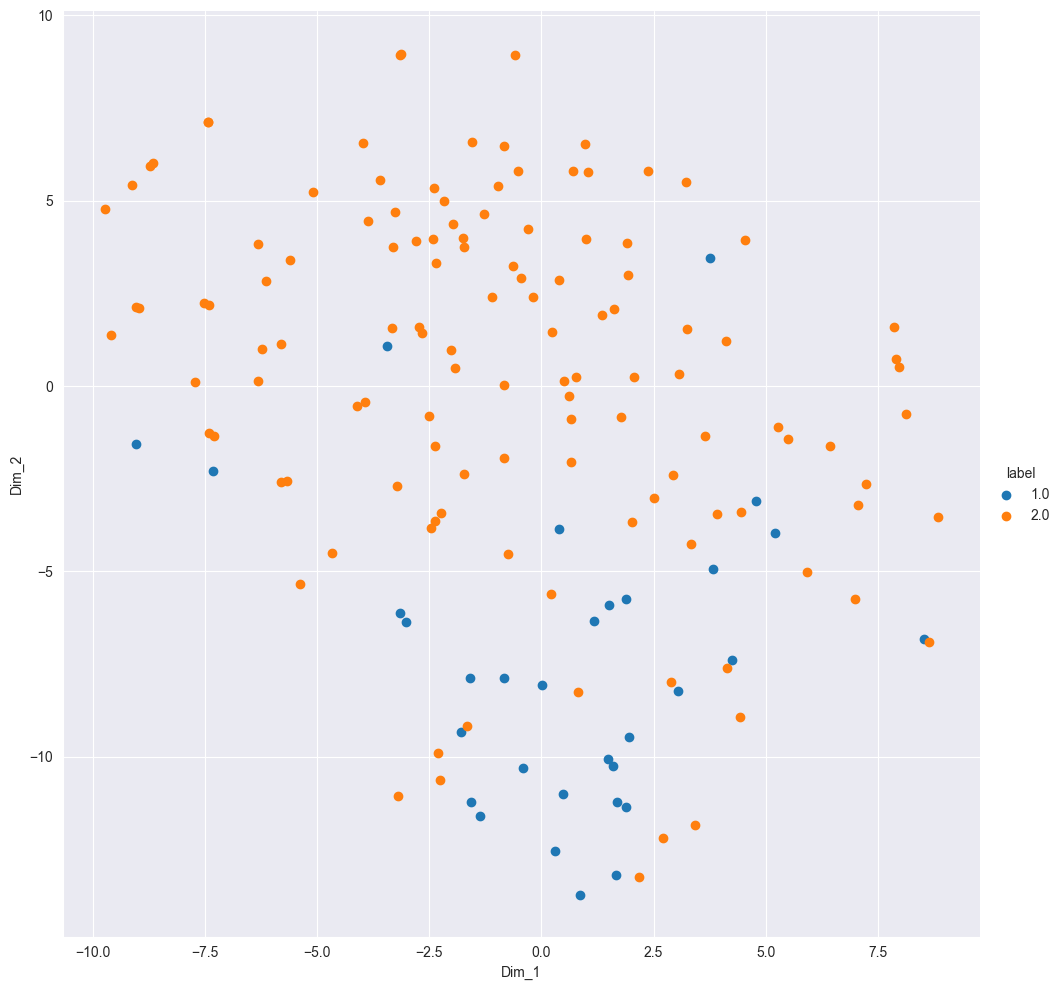

In [190]:
tsne_kwargs = {}
X_tsne =  StandardScaler().fit_transform(hepatitis_features)
plot_tsne(X=X_tsne, save=False, save_name="initial_tsne",
          title="TSNE 2-Dimensional representation of the 3-Dimensional feature space",tsne_kwargs=tsne_kwargs)

Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data 0.712337076663971


<Figure size 2000x2000 with 0 Axes>

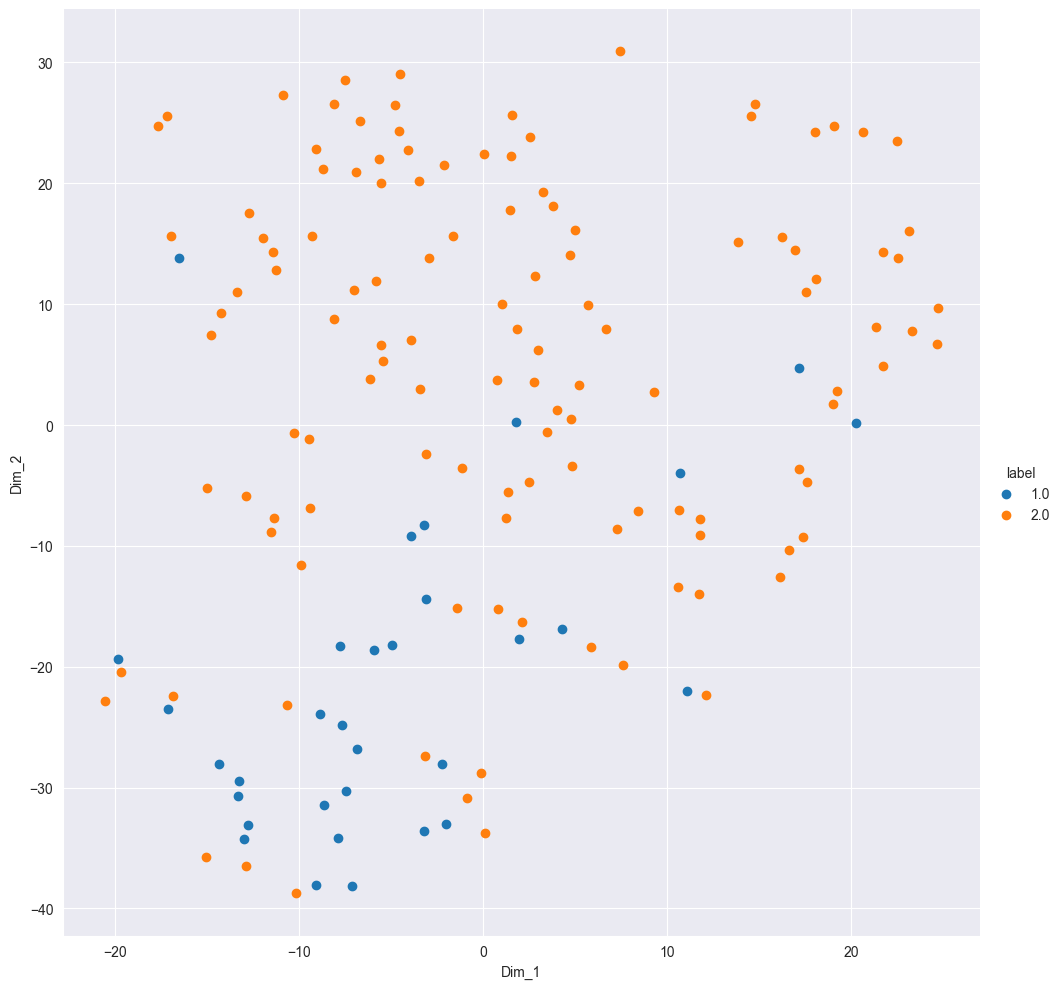

In [191]:
tsne_kwargs = {'n_components':2, 'learning_rate':'auto',
                'init':'pca', 'perplexity':10, 'method':'barnes_hut'}
X_tsne =  StandardScaler().fit_transform(hepatitis_features)
plot_tsne(X=X_tsne, save=False, save_name="initial_tsne",
          title="TSNE 2-Dimensional representation of the 3-Dimensional feature space",tsne_kwargs=tsne_kwargs)

Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data 0.6177749037742615


<Figure size 2000x2000 with 0 Axes>

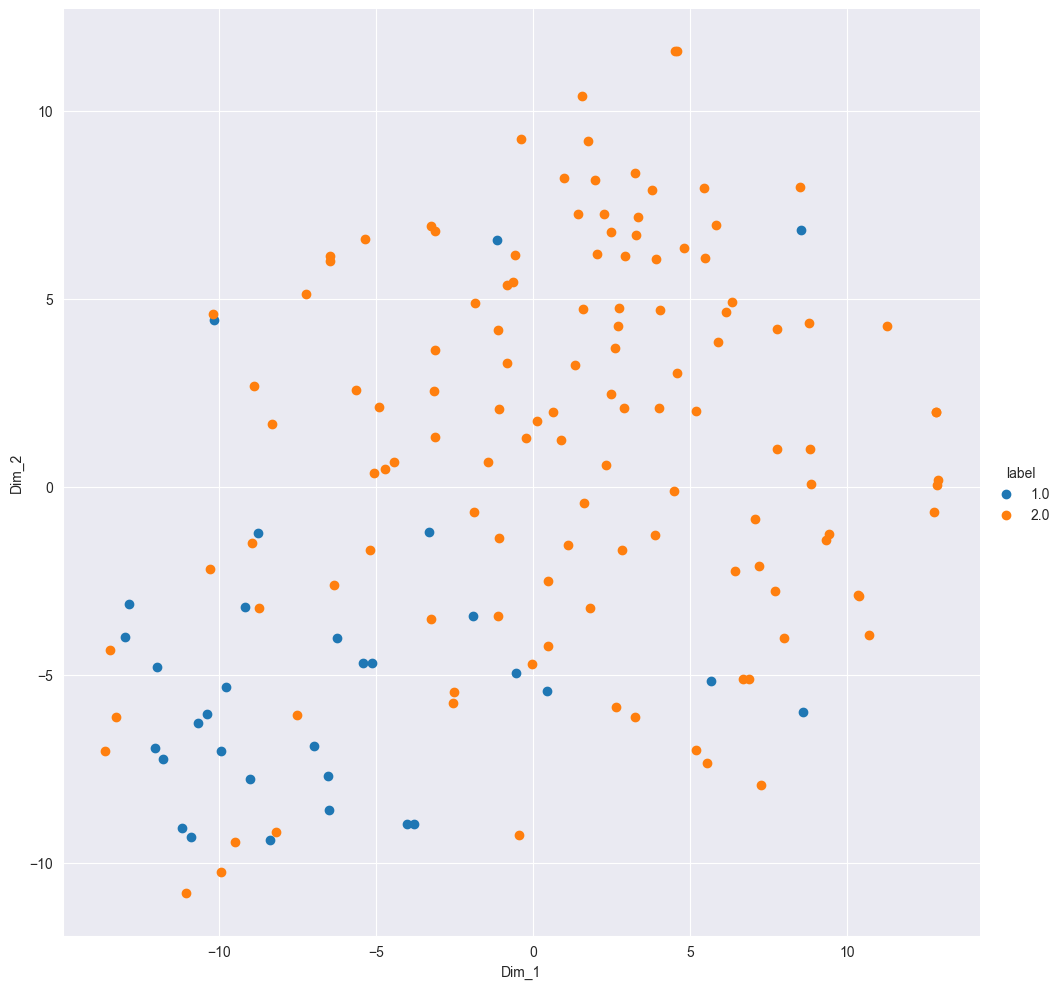

In [192]:
tsne_kwargs = {'n_components':2, 'learning_rate':'auto',
                'init':'pca', 'perplexity':25, 'method':'barnes_hut'}
X_tsne =  StandardScaler().fit_transform(hepatitis_features)
plot_tsne(X=X_tsne, save=False, save_name="initial_tsne",
          title="TSNE 2-Dimensional representation of the 3-Dimensional feature space",tsne_kwargs=tsne_kwargs)

Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data 0.5009135603904724


<Figure size 2000x2000 with 0 Axes>

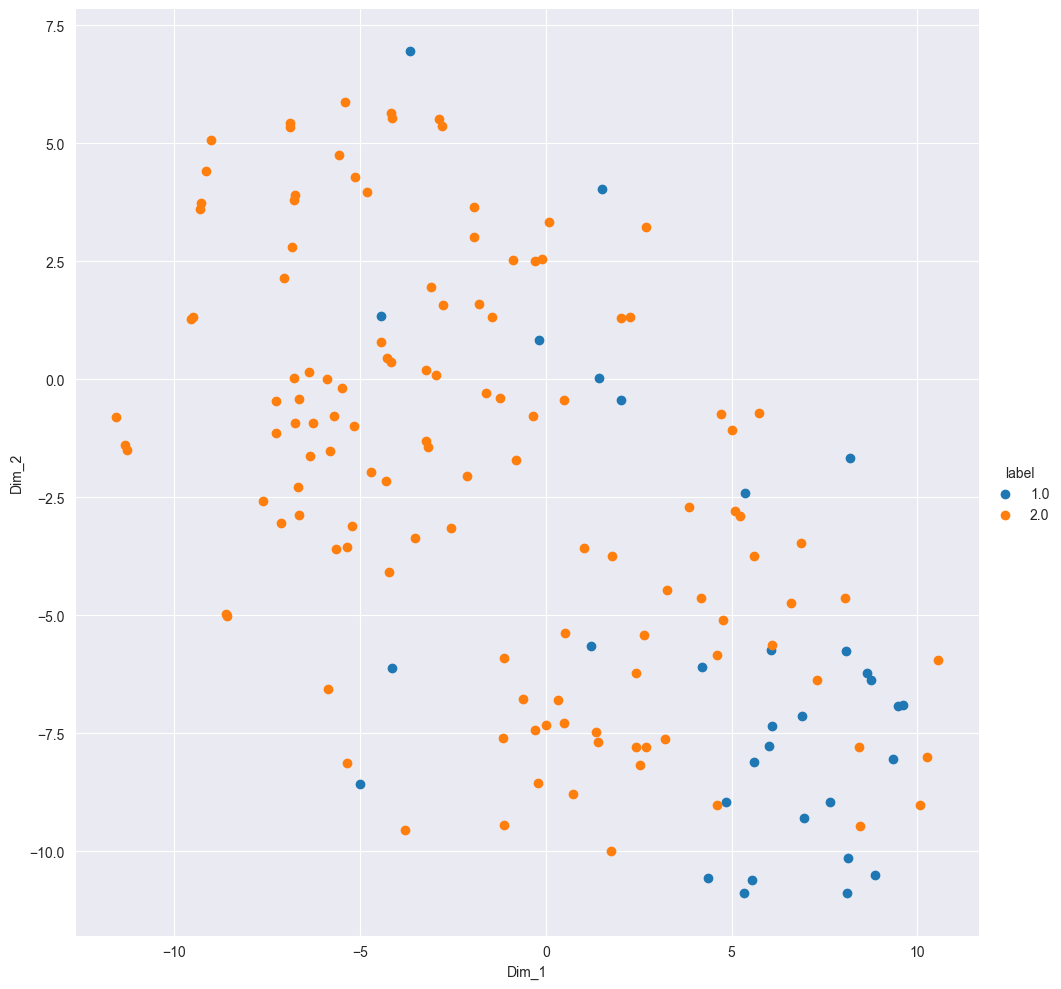

In [193]:
tsne_kwargs = {}
X_tsne =  MaxAbsScaler().fit_transform(hepatitis_features)
plot_tsne(X=X_tsne, save=False, save_name="initial_tsne",
          title="TSNE 2-Dimensional representation of the 3-Dimensional feature space",tsne_kwargs=tsne_kwargs)

Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data 0.6534048914909363


<Figure size 2000x2000 with 0 Axes>

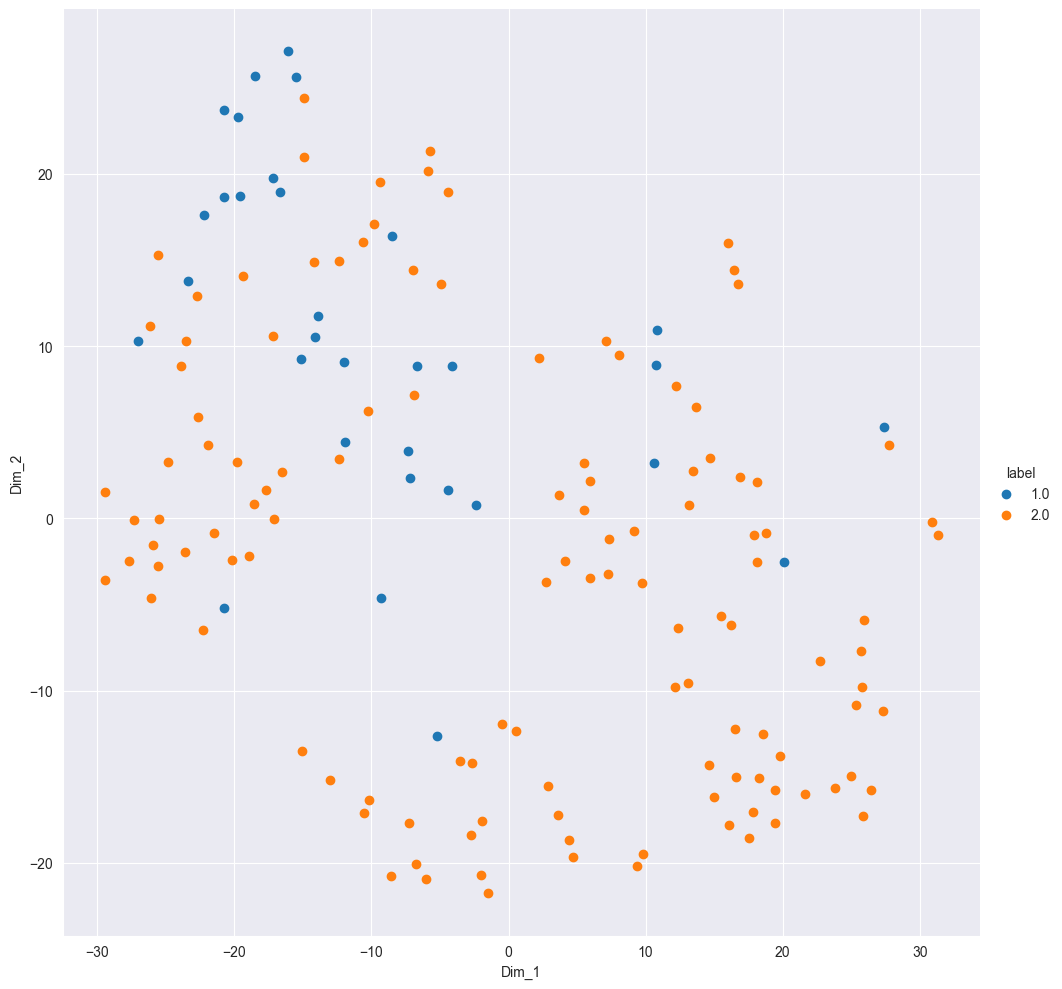

In [194]:
tsne_kwargs = {'n_components':2, 'learning_rate':'auto',
                'init':'pca', 'perplexity':10, 'method':'barnes_hut'}
X_tsne =  MaxAbsScaler().fit_transform(hepatitis_features)
plot_tsne(X=X_tsne, save=False, save_name="initial_tsne",
          title="TSNE 2-Dimensional representation of the 3-Dimensional feature space",tsne_kwargs=tsne_kwargs)

Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data 0.5267334580421448


<Figure size 2000x2000 with 0 Axes>

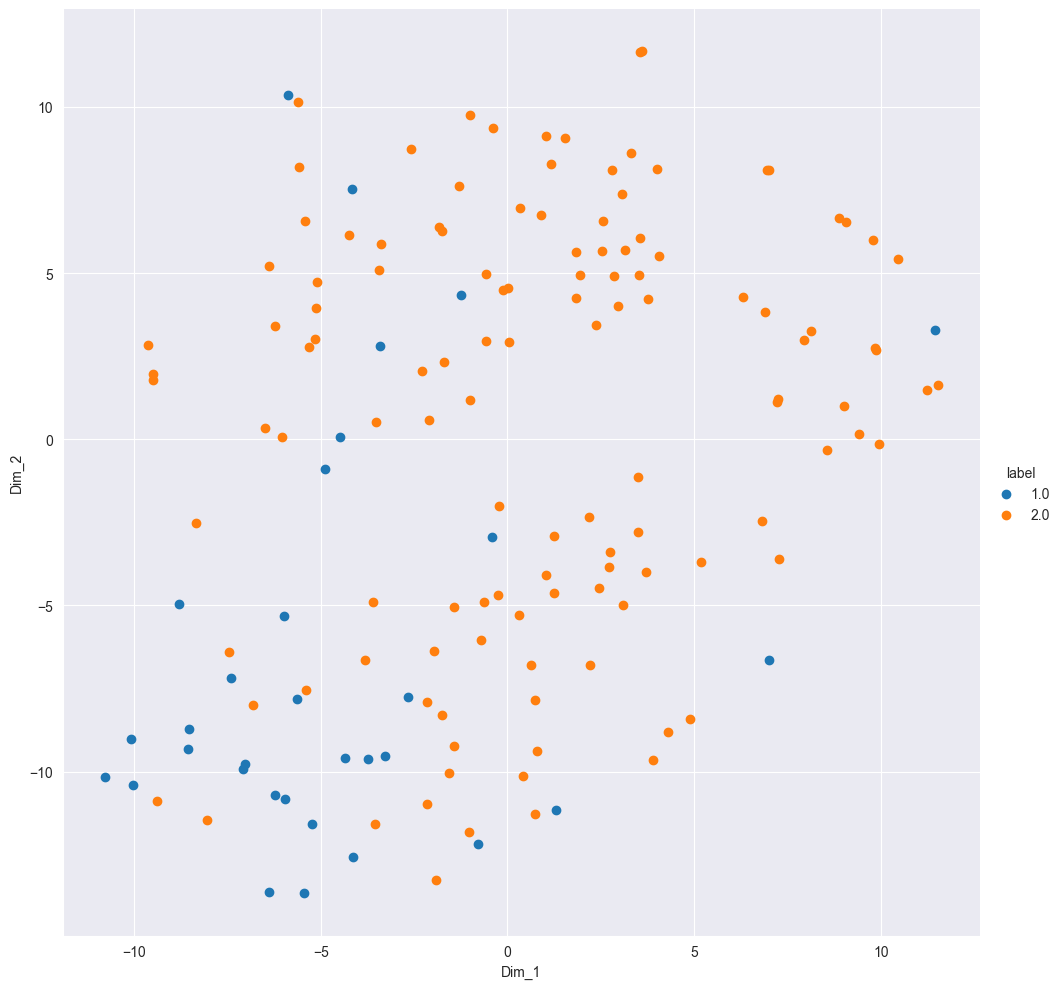

In [195]:
tsne_kwargs = {'n_components':2, 'learning_rate':'auto',
                'init':'pca', 'perplexity':25, 'method':'barnes_hut'}
X_tsne =  MaxAbsScaler().fit_transform(hepatitis_features)
plot_tsne(X=X_tsne, save=False, save_name="initial_tsne",
          title="TSNE 2-Dimensional representation of the 3-Dimensional feature space",tsne_kwargs=tsne_kwargs)

Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data 0.30170148611068726


<Figure size 2000x2000 with 0 Axes>

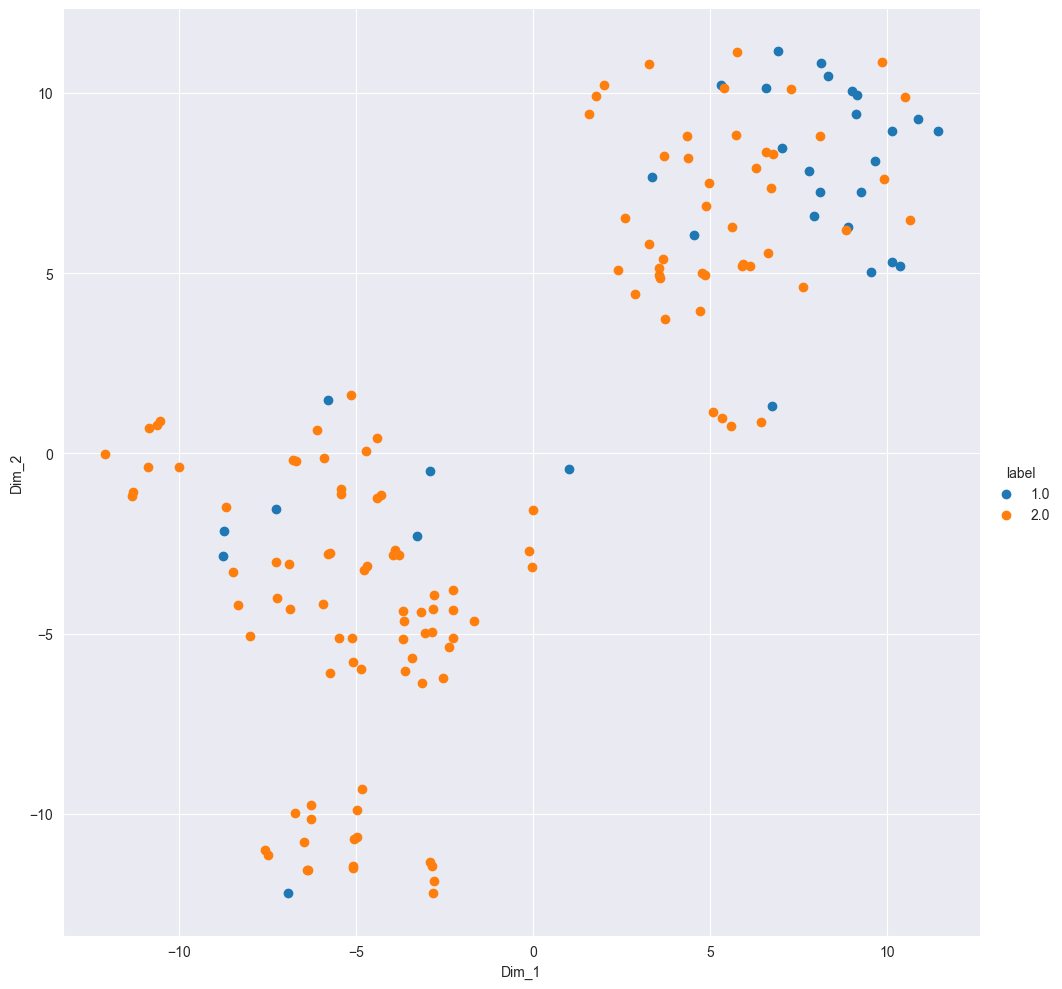

In [196]:
tsne_kwargs = {}
X_tsne =  MinMaxScaler().fit_transform(hepatitis_features)
plot_tsne(X=X_tsne, save=False, save_name="initial_tsne",
          title="TSNE 2-Dimensional representation of the 3-Dimensional feature space",tsne_kwargs=tsne_kwargs)

Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data 0.4416695535182953


<Figure size 2000x2000 with 0 Axes>

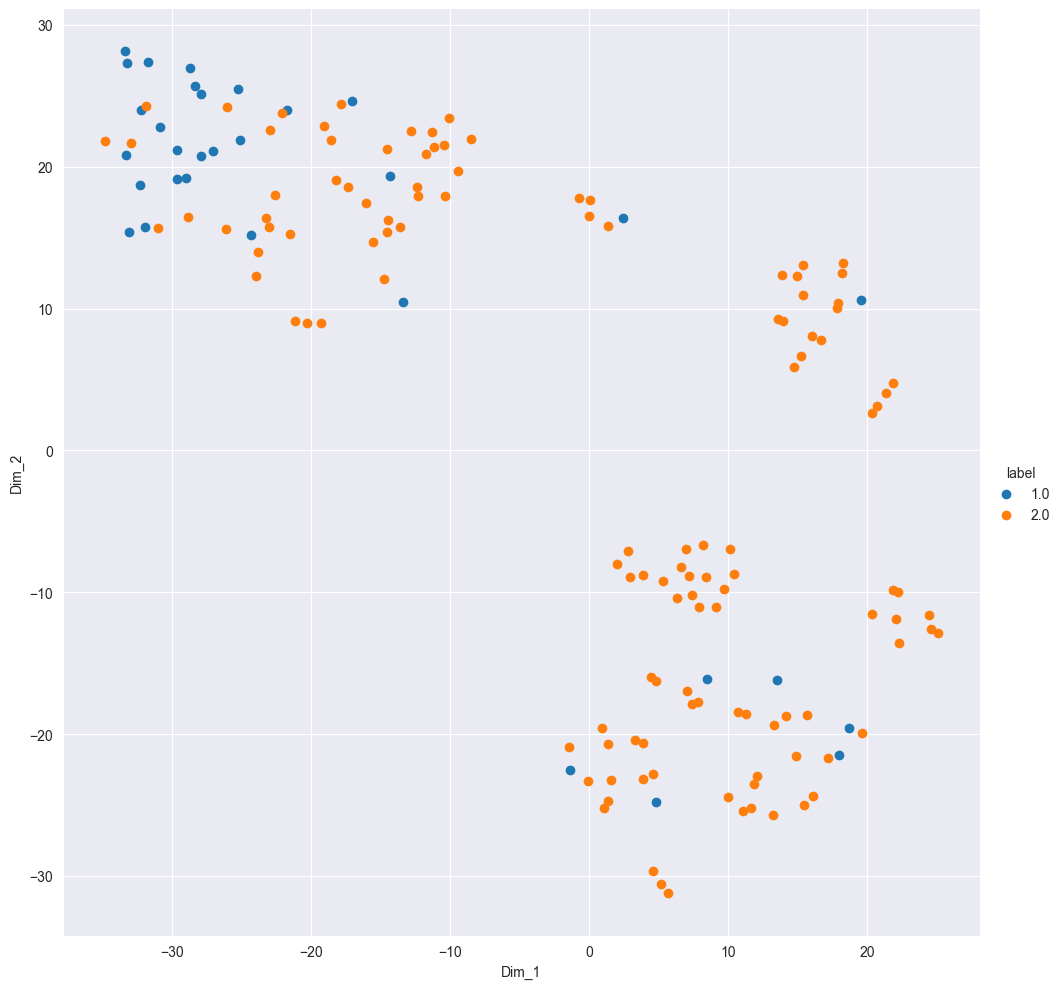

In [197]:
tsne_kwargs = {'n_components':2, 'learning_rate':'auto',
                'init':'pca', 'perplexity':10, 'method':'barnes_hut'}
X_tsne =  MinMaxScaler().fit_transform(hepatitis_features)
plot_tsne(X=X_tsne, save=False, save_name="initial_tsne",
          title="TSNE 2-Dimensional representation of the 3-Dimensional feature space",tsne_kwargs=tsne_kwargs)

Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data 0.32487258315086365


<Figure size 2000x2000 with 0 Axes>

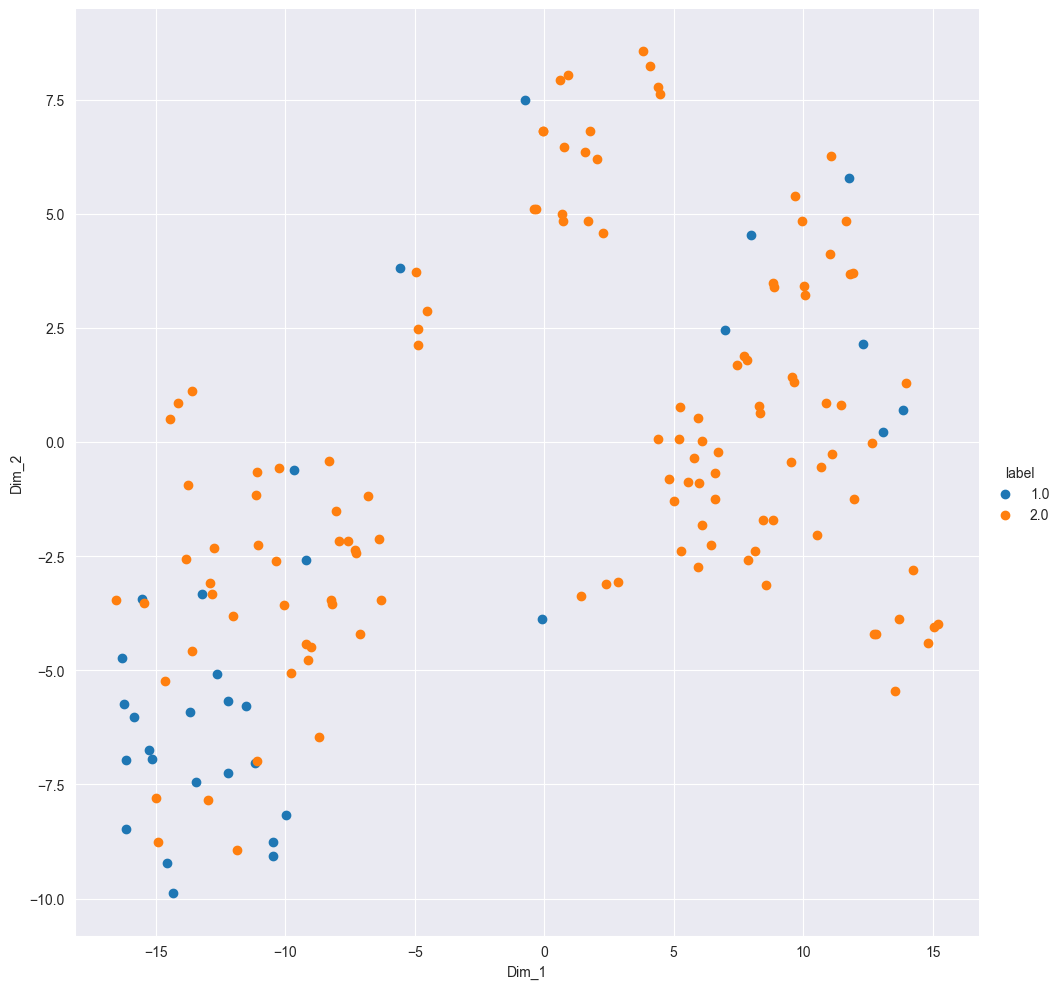

In [198]:
tsne_kwargs = {'n_components':2, 'learning_rate':'auto',
                'init':'pca', 'perplexity':25, 'method':'barnes_hut'}
X_tsne =  MinMaxScaler().fit_transform(hepatitis_features)
plot_tsne(X=X_tsne, save=False, save_name="initial_tsne",
          title="TSNE 2-Dimensional representation of the 3-Dimensional feature space",tsne_kwargs=tsne_kwargs)

Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data 0.45110809803009033


<Figure size 2000x2000 with 0 Axes>

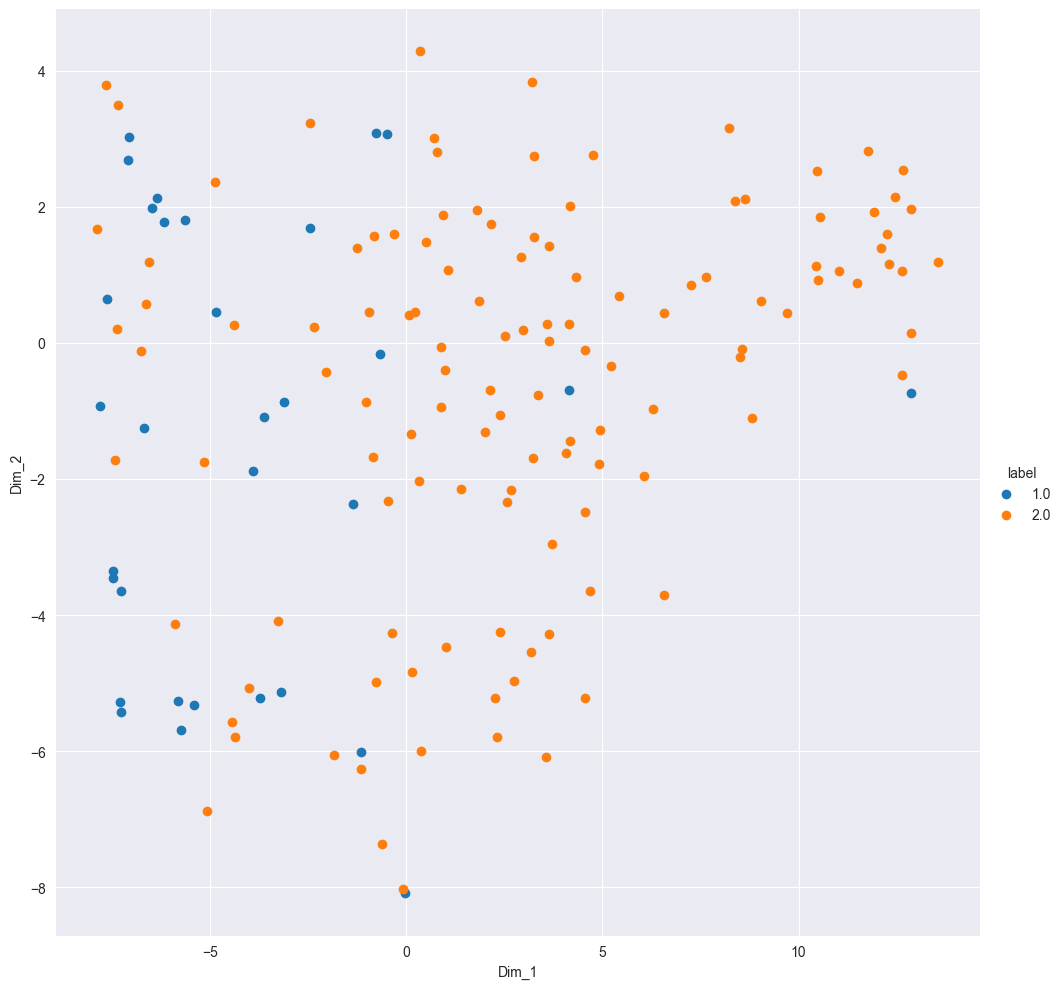

In [199]:
tsne_kwargs = {}
X_tsne =  RobustScaler().fit_transform(hepatitis_features)
plot_tsne(X=X_tsne, save=False, save_name="initial_tsne",
          title="TSNE 2-Dimensional representation of the 3-Dimensional feature space",tsne_kwargs=tsne_kwargs)

Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data 0.7110013961791992


<Figure size 2000x2000 with 0 Axes>

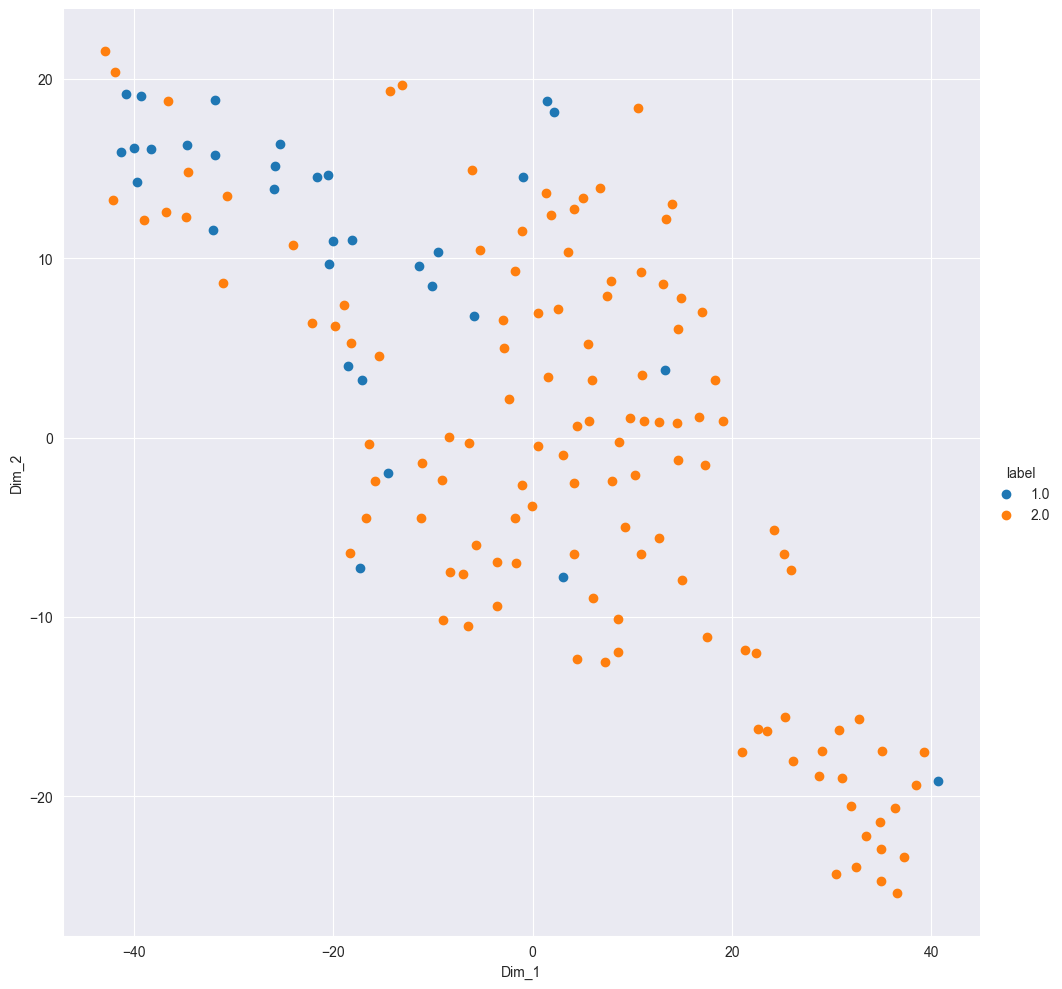

In [200]:
tsne_kwargs = {'n_components':2, 'learning_rate':'auto',
                'init':'pca', 'perplexity':10, 'method':'barnes_hut'}
X_tsne =  RobustScaler().fit_transform(hepatitis_features)
plot_tsne(X=X_tsne, save=False, save_name="initial_tsne",
          title="TSNE 2-Dimensional representation of the 3-Dimensional feature space",tsne_kwargs=tsne_kwargs)

Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data 0.5179785490036011


<Figure size 2000x2000 with 0 Axes>

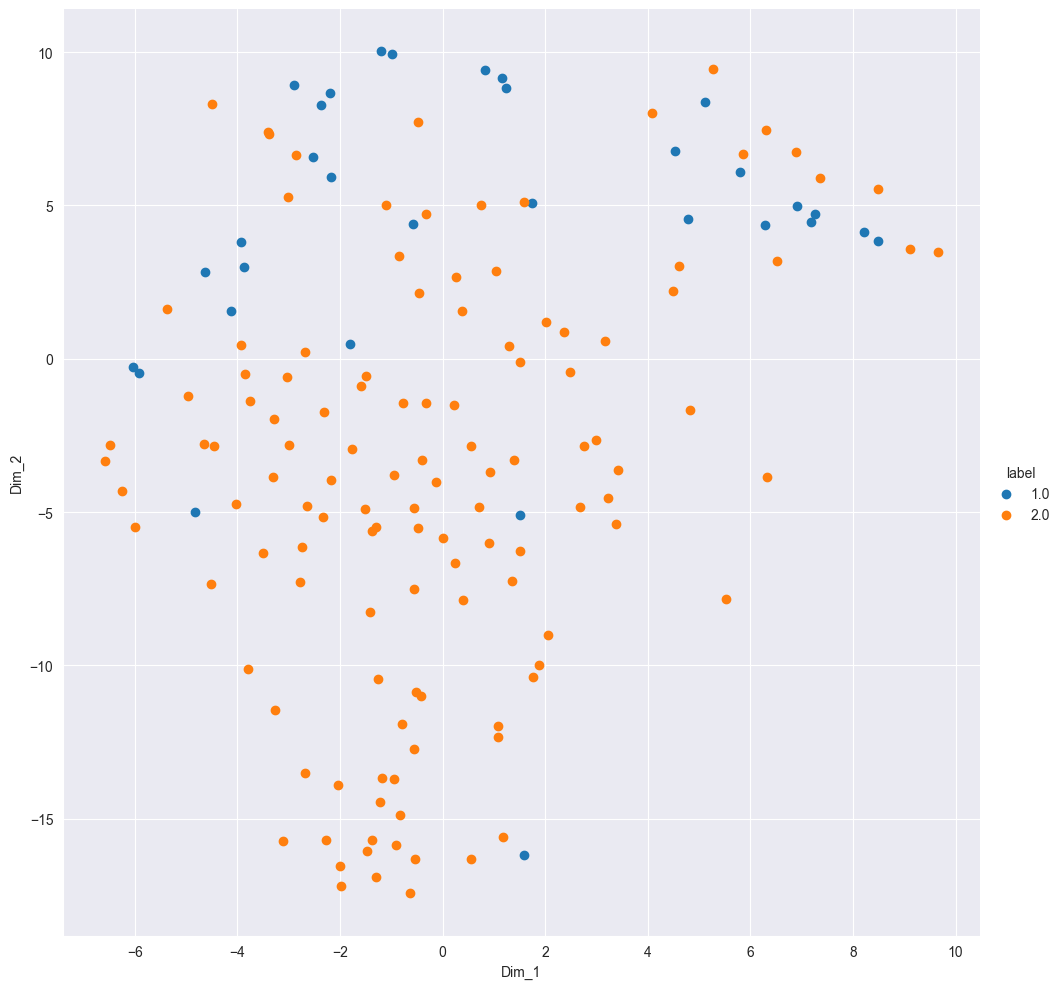

In [201]:
tsne_kwargs = {'n_components':2, 'learning_rate':'auto',
                'init':'pca', 'perplexity':25, 'method':'barnes_hut'}
X_tsne =  RobustScaler().fit_transform(hepatitis_features)
plot_tsne(X=X_tsne, save=False, save_name="initial_tsne",
          title="TSNE 2-Dimensional representation of the 3-Dimensional feature space",tsne_kwargs=tsne_kwargs)

In [202]:
def plot_umap(X, title, umap_kwargs,  save=False, save_name="umap"):
    X_umap = UMAP(**umap_kwargs).fit_transform(X)
    plt.figure(figsize=(10, 10))
    umap_data = np.vstack((X_umap.T, hepatitis_targets)).T
    tsne_df = pd.DataFrame(data=umap_data,columns=("Dim_1","Dim_2","label"))
    plt.figure(figsize=(20, 20))
    sns.FacetGrid(tsne_df,hue="label",height=10).map(plt.scatter,"Dim_1","Dim_2").add_legend()
    # sns.scatterplot(X_umap, alpha=0.8)
    # plt.scatter(X_umap[:, 0], X_umap[:, 1], c=hepatitis_targets)
    # plt.axis("equal")
    # plt.ylabel("Axis y")
    # plt.xlabel("Axis x")
    # plt.legend(title="Class")
    # plt.title(title)
    # plt.grid()
    if save:
        plt.savefig(fname=f'images/{save_name}.png', dpi=300,
                    format='png',  bbox_inches='tight')
    plt.show()


<Figure size 1000x1000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

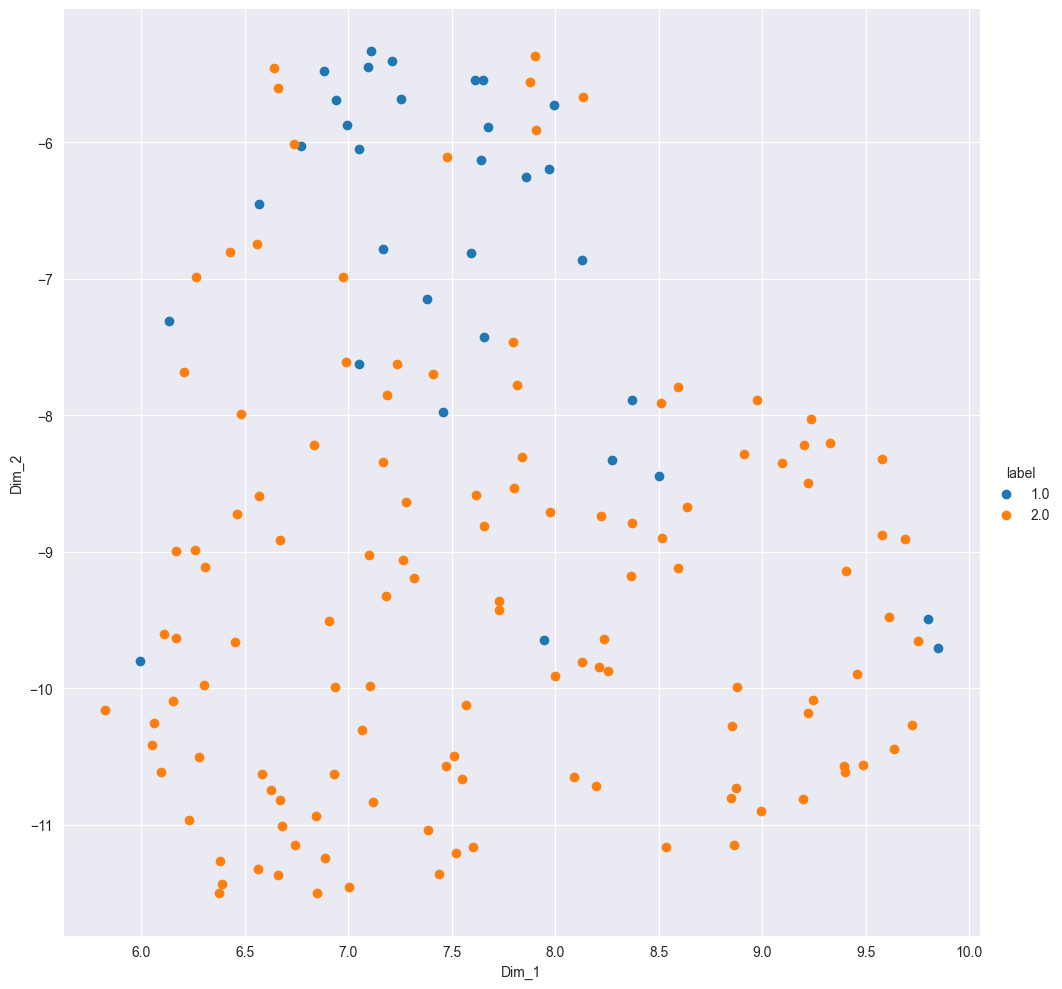

In [203]:
umap_kwargs = {}
X_umap = StandardScaler().fit_transform(hepatitis_features)
plot_umap(X=X_umap, umap_kwargs=umap_kwargs, save=False,
          title="UMAP 2-Dimensional representation of the 3-Dimensional feature space")

<Figure size 1000x1000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

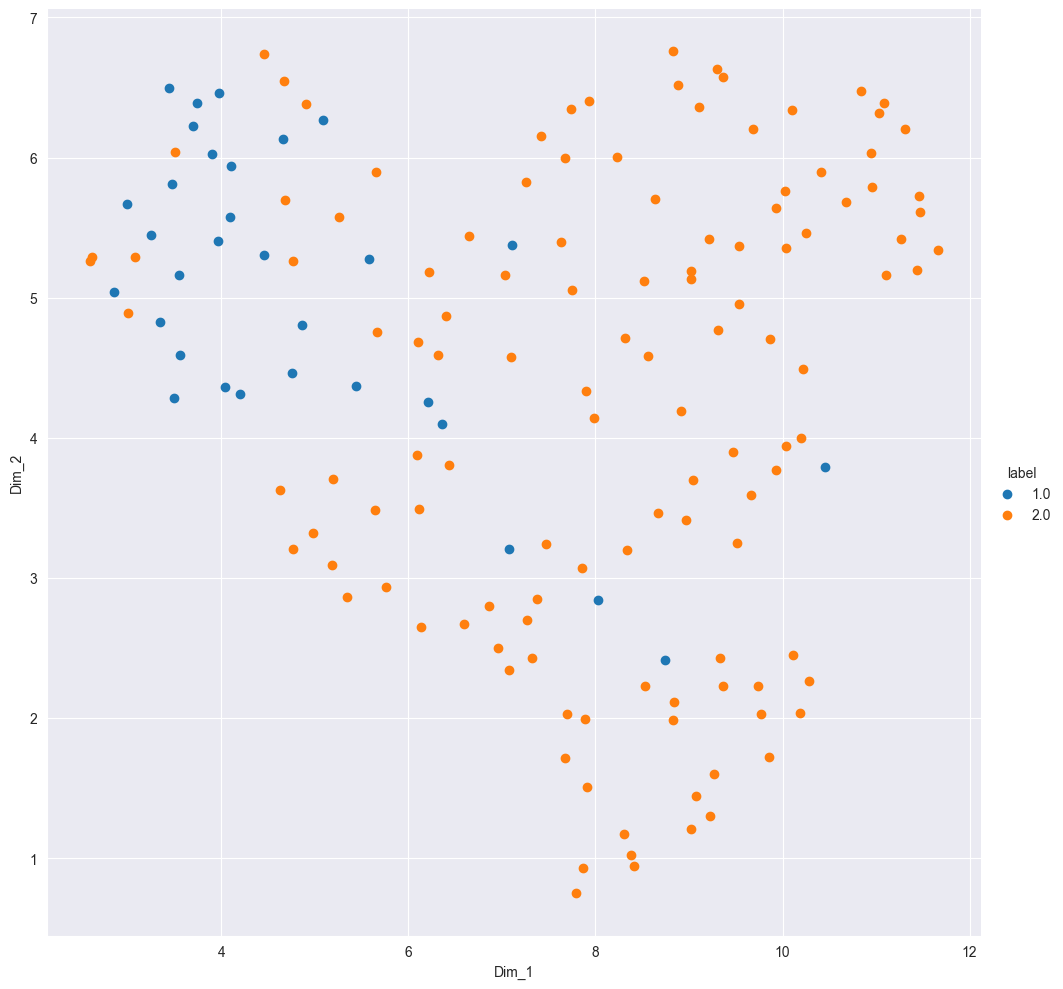

In [204]:
umap_kwargs = {'n_components':2,'n_neighbors':10,
                      'min_dist':0.3,
                      'metric':'correlation'}
X_umap = StandardScaler().fit_transform(hepatitis_features)
plot_umap(X=X_umap, umap_kwargs=umap_kwargs, save=False,
          title="UMAP 2-Dimensional representation of the 3-Dimensional feature space")

<Figure size 1000x1000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

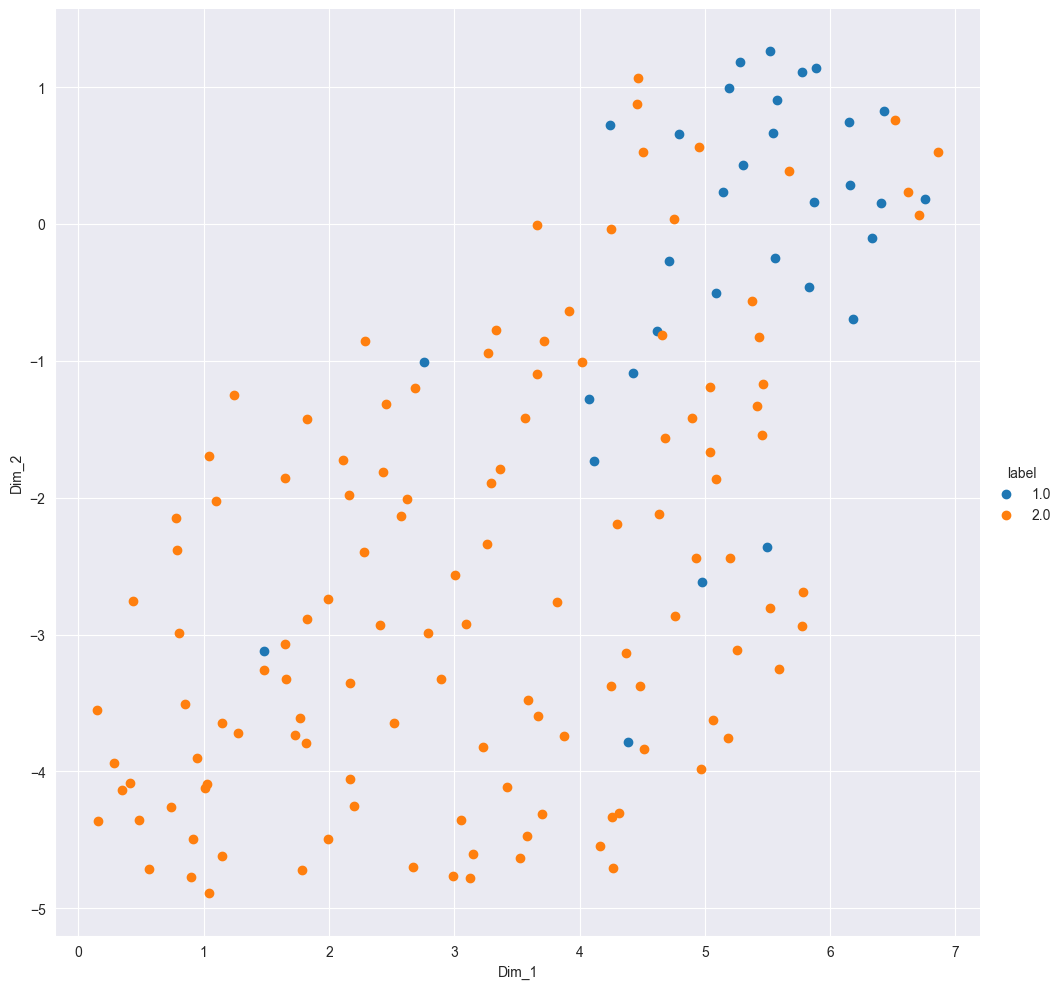

In [205]:
umap_kwargs = {'n_components':2,'n_neighbors':25,
                      'min_dist':0.3,
                      'metric':'correlation'}
X_umap = StandardScaler().fit_transform(hepatitis_features)
plot_umap(X=X_umap, umap_kwargs=umap_kwargs, save=False,
          title="UMAP 2-Dimensional representation of the 3-Dimensional feature space")

<Figure size 1000x1000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

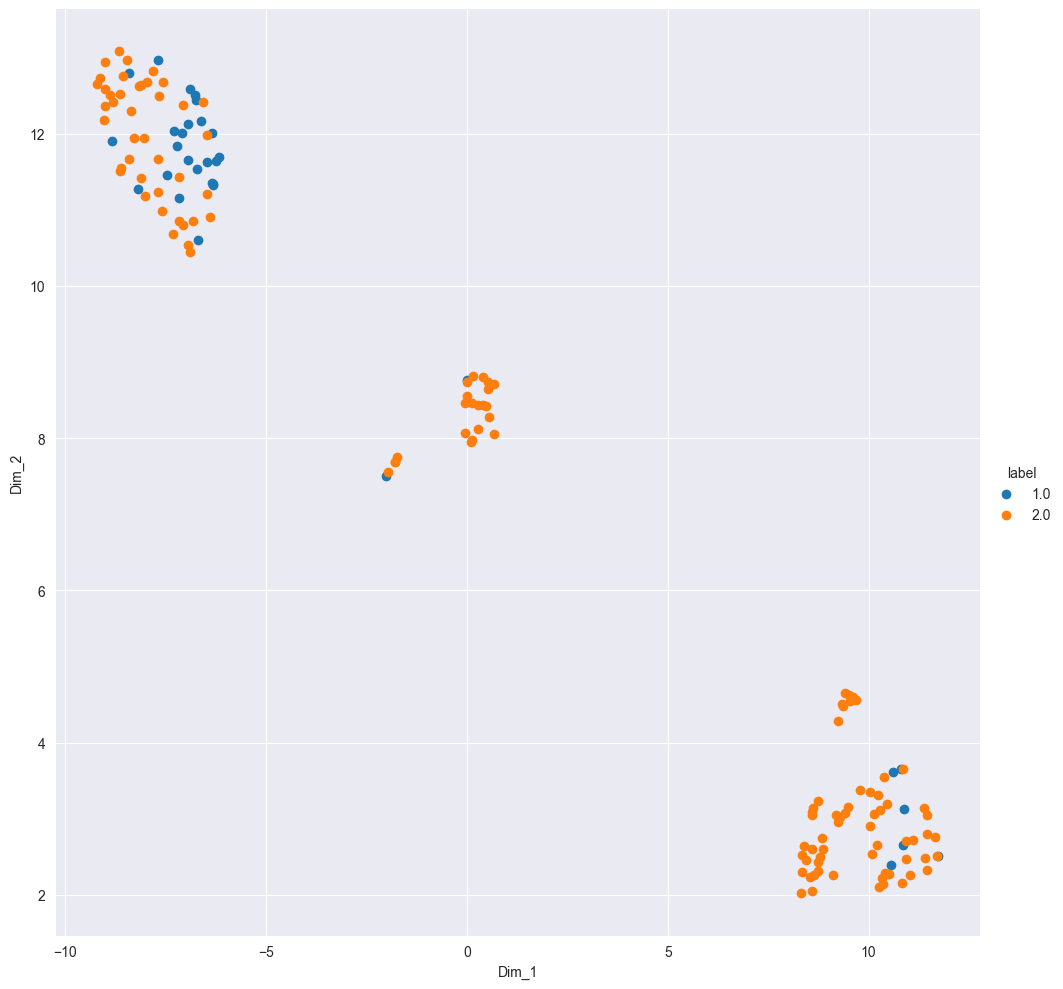

In [206]:
umap_kwargs = {}
X_umap = MinMaxScaler().fit_transform(hepatitis_features)
plot_umap(X=X_umap, umap_kwargs=umap_kwargs, save=False,
          title="UMAP 2-Dimensional representation of the 3-Dimensional feature space")

<Figure size 1000x1000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

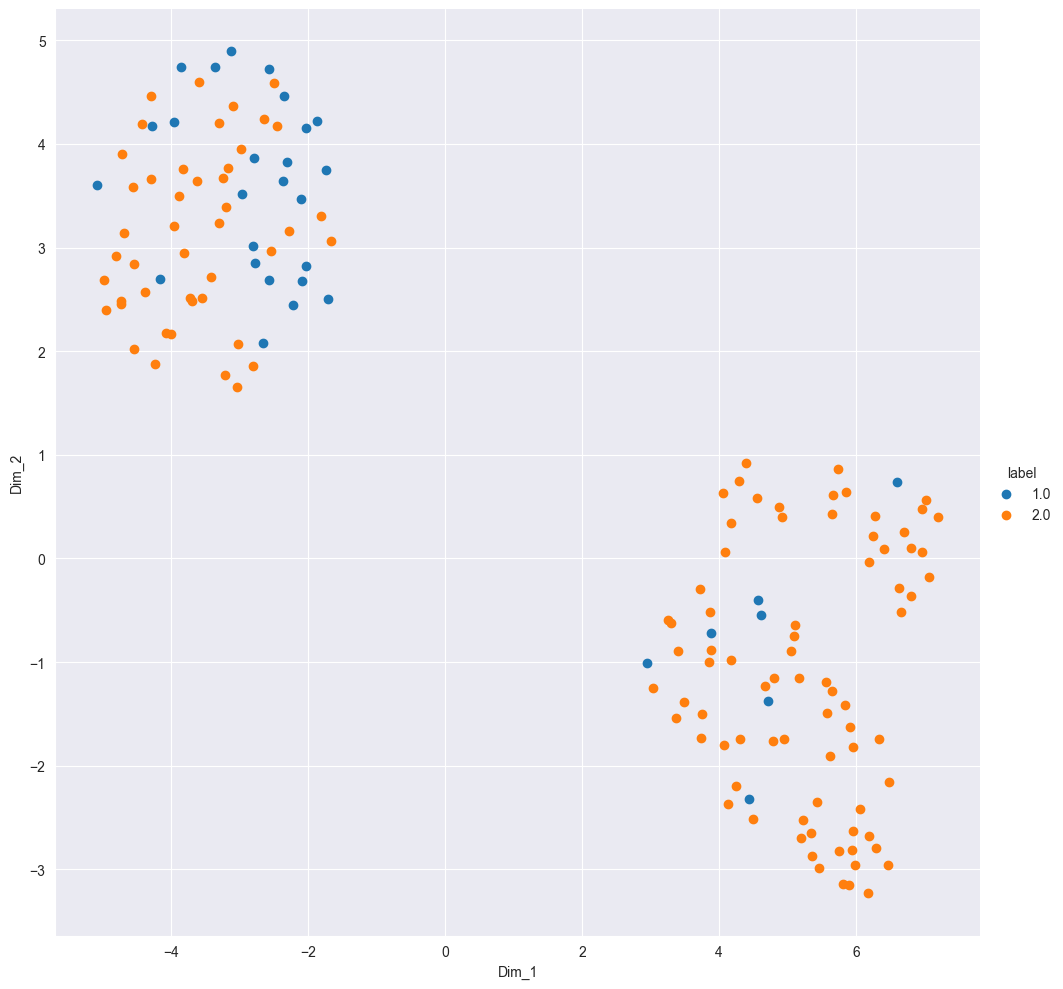

In [207]:
umap_kwargs = {'n_components':2,'n_neighbors':25,
                      'min_dist':0.3,
                      'metric':'correlation'}
X_umap = MinMaxScaler().fit_transform(hepatitis_features)
plot_umap(X=X_umap, umap_kwargs=umap_kwargs, save=False,
          title="UMAP 2-Dimensional representation of the 3-Dimensional feature space")

<Figure size 1000x1000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

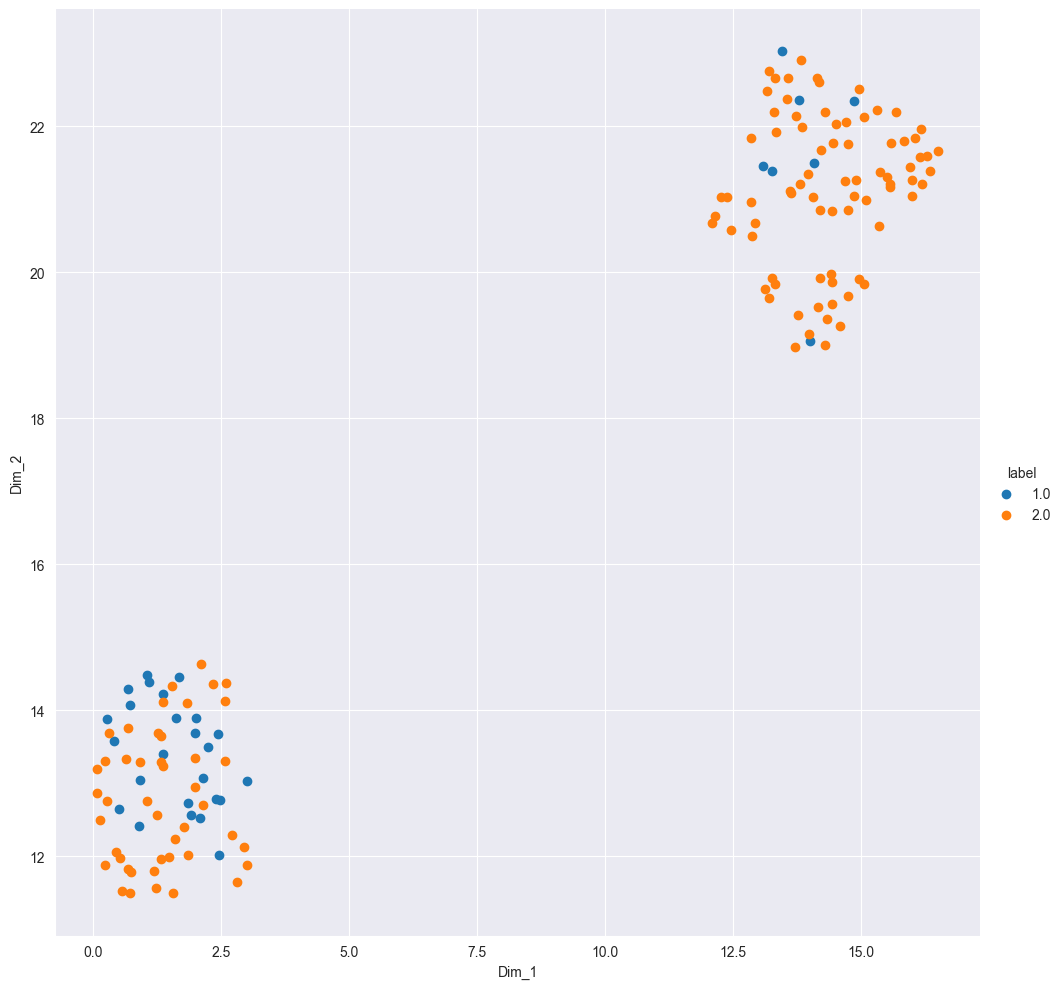

In [208]:
umap_kwargs = {'n_components':2,'n_neighbors':50,
                      'min_dist':0.3,
                      'metric':'correlation'}
X_umap = MinMaxScaler().fit_transform(hepatitis_features)
plot_umap(X=X_umap, umap_kwargs=umap_kwargs, save=False,
          title="UMAP 2-Dimensional representation of the 3-Dimensional feature space")

<Figure size 1000x1000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

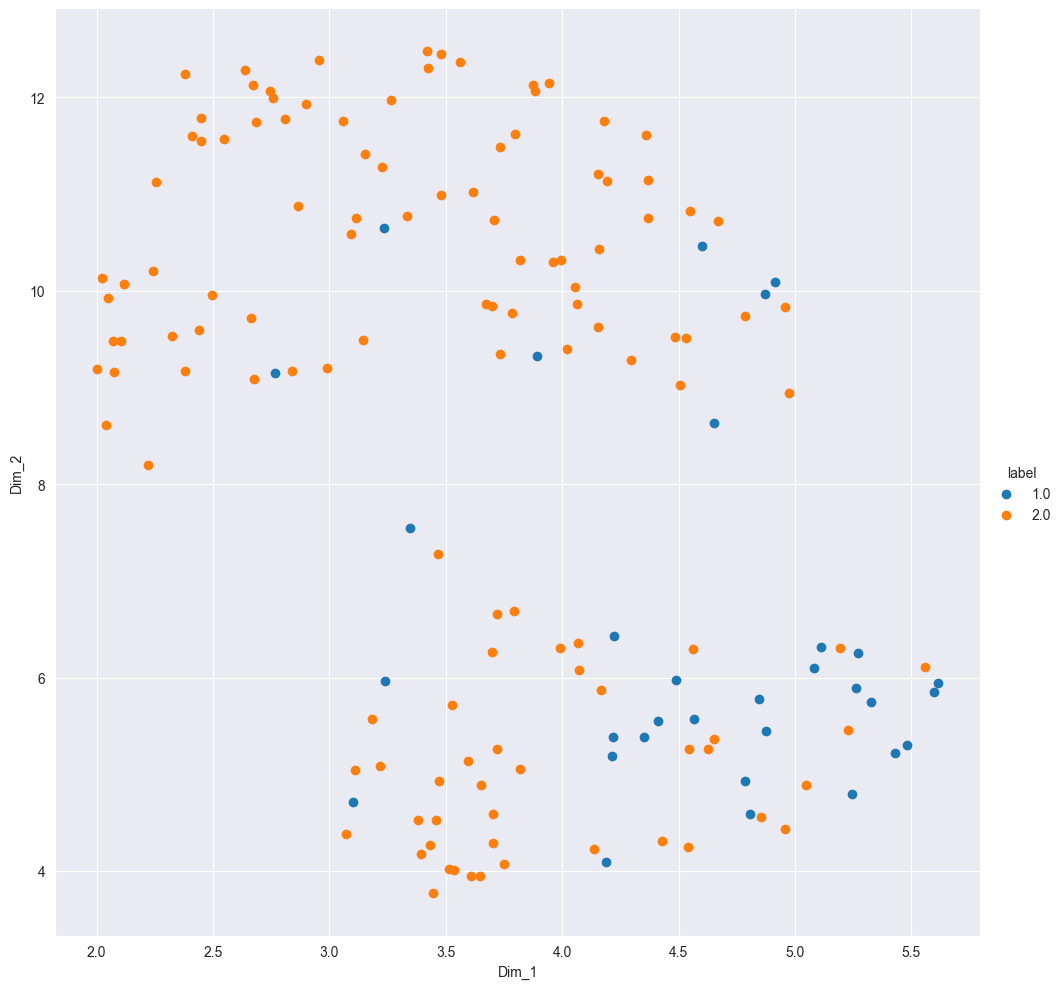

In [209]:
umap_kwargs = {}
X_umap = MaxAbsScaler().fit_transform(hepatitis_features)
plot_umap(X=X_umap, umap_kwargs=umap_kwargs, save=False,
          title="UMAP 2-Dimensional representation of the 3-Dimensional feature space")

<Figure size 1000x1000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

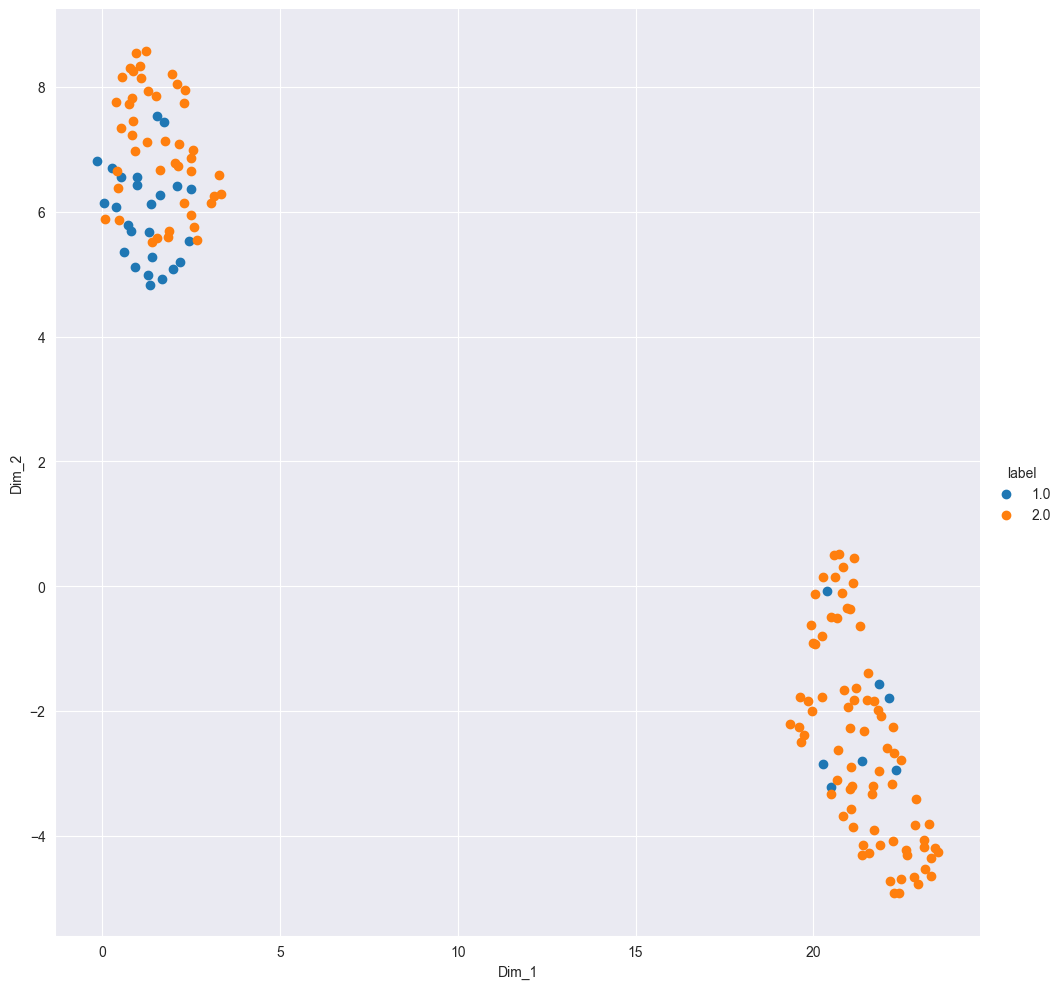

In [210]:
umap_kwargs = {'n_components':2,'n_neighbors':25,
                      'min_dist':0.3,
                      'metric':'correlation'}
X_umap = MinMaxScaler().fit_transform(hepatitis_features)
plot_umap(X=X_umap, umap_kwargs=umap_kwargs, save=False,
          title="UMAP 2-Dimensional representation of the 3-Dimensional feature space")

<Figure size 1000x1000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

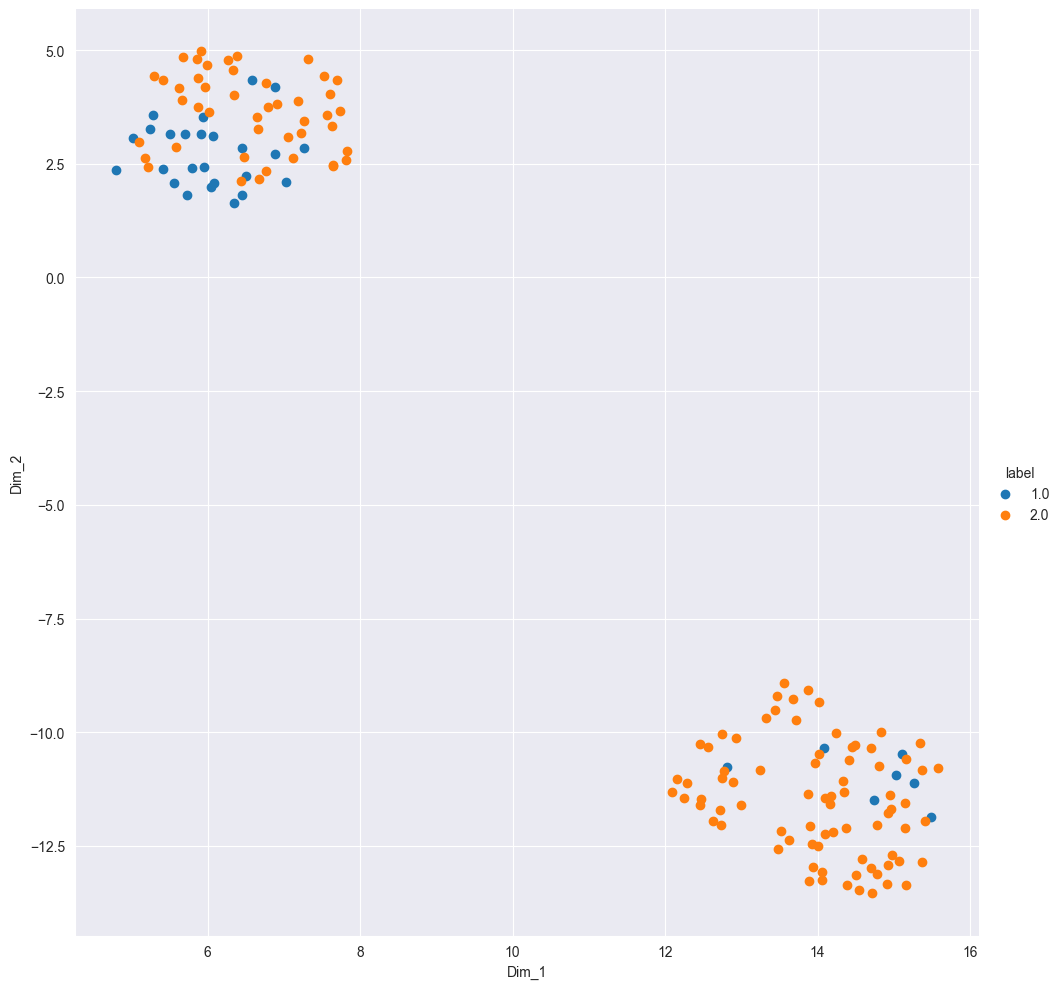

In [211]:
umap_kwargs = {'n_components':2,'n_neighbors':50,
                      'min_dist':0.3,
                      'metric':'correlation'}
X_umap = MinMaxScaler().fit_transform(hepatitis_features)
plot_umap(X=X_umap, umap_kwargs=umap_kwargs, save=False,
          title="UMAP 2-Dimensional representation of the 3-Dimensional feature space")

<Figure size 1000x1000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

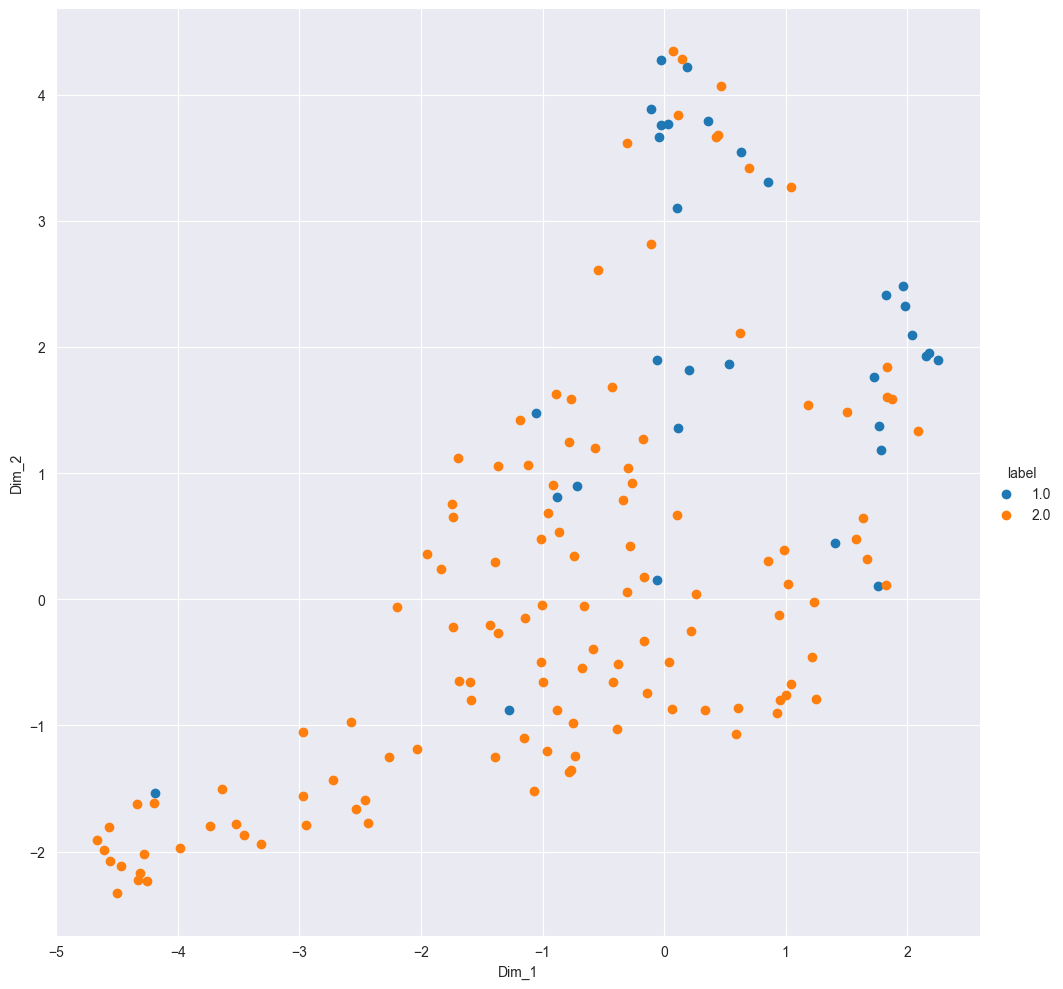

In [212]:
umap_kwargs = {}
X_umap = RobustScaler().fit_transform(hepatitis_features)
plot_umap(X=X_umap, umap_kwargs=umap_kwargs, save=False,
          title="UMAP 2-Dimensional representation of the 3-Dimensional feature space")

<Figure size 1000x1000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

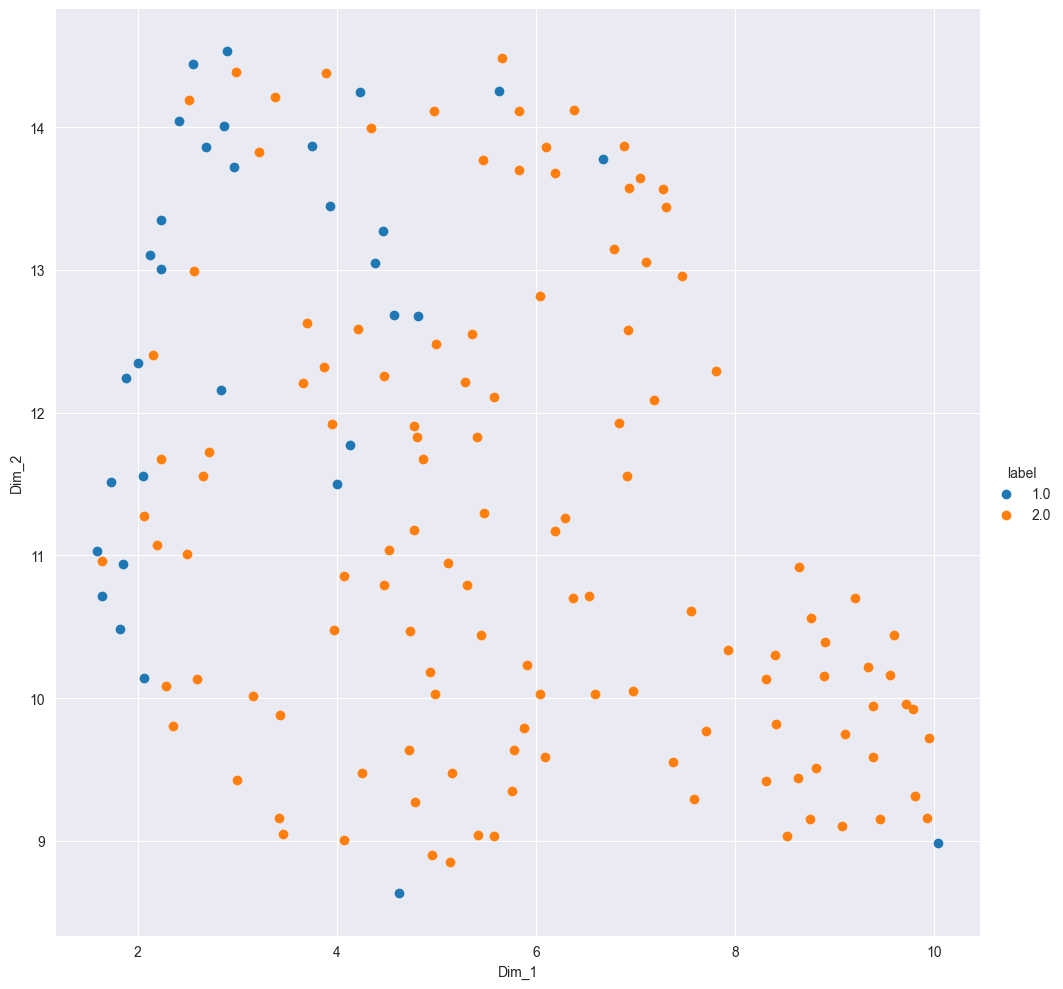

In [213]:
umap_kwargs = {'n_components':2,'n_neighbors':10,
                      'min_dist':0.3,
                      'metric':'correlation'}
X_umap = RobustScaler().fit_transform(hepatitis_features)
plot_umap(X=X_umap, umap_kwargs=umap_kwargs, save=False,
          title="UMAP 2-Dimensional representation of the 3-Dimensional feature space")

<Figure size 1000x1000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

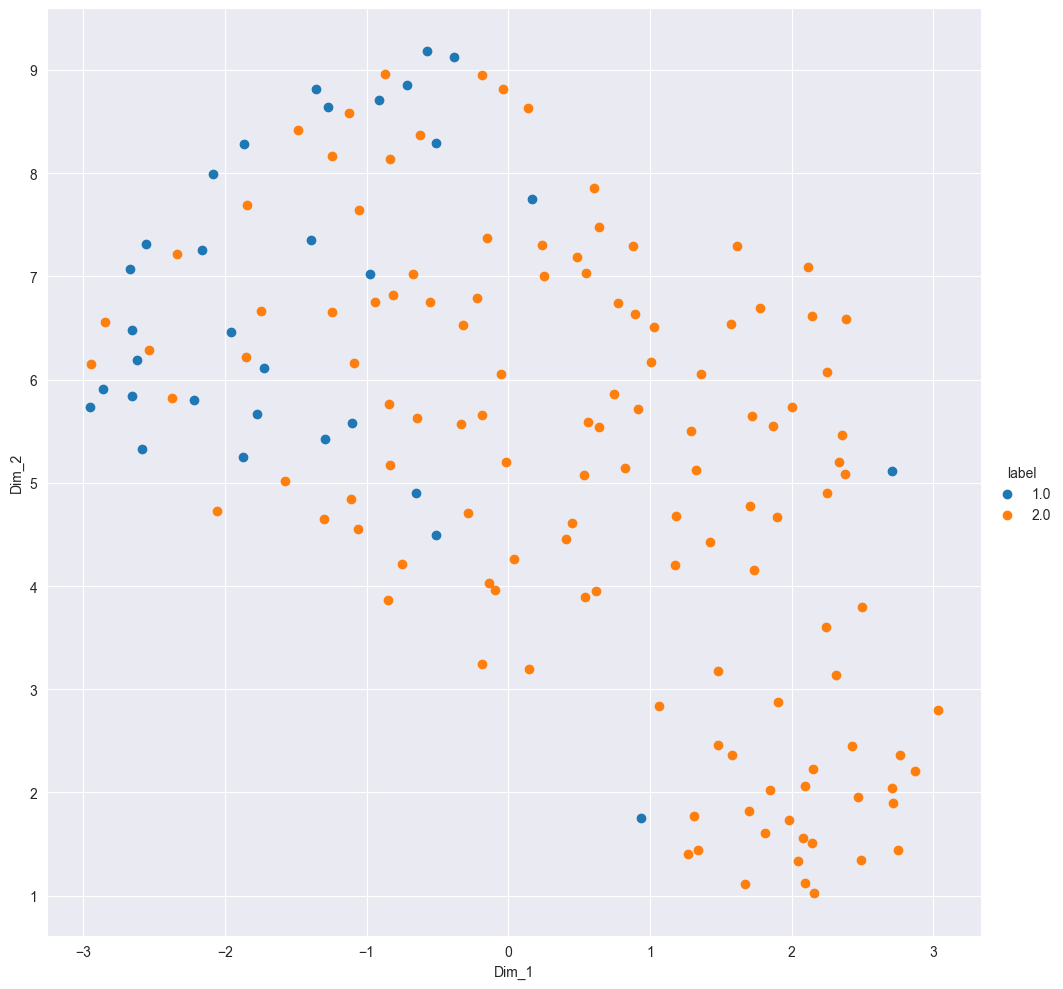

In [214]:
umap_kwargs = {'n_components':2,'n_neighbors':25,
                      'min_dist':0.3,
                      'metric':'correlation'}
X_umap = RobustScaler().fit_transform(hepatitis_features)
plot_umap(X=X_umap, umap_kwargs=umap_kwargs, save=False,
          title="UMAP 2-Dimensional representation of the 3-Dimensional feature space")

In [215]:
#import pacmap, trimap - не работает на python 3.12. Попробовать запустить на python 3.7
# Применить методы стандартизации/масштабирования

In [216]:
X_full, y_full = hepatitis_features, hepatitis_targets
print(hepatitis.columns)
feature_mapping = {
    "Class": "Class",
    "Age": "Age",
    "Sex": "Sex",
    "Steroid": "Steroid",
    "Antivirals": "Antivirals",
    "Fatigue": "Fatigue",
    "Malaise": "Malaise",
    "Liver Big": "Liver Big",
    "Liver Firm": "Liver Firm",
    "Spleen Palpable": "Spleen Palpable",
    "Spiders": "Spiders",
    "Bilirubin": "Bilirubin",
    "Alk Phosphate": "Alk Phosphate",
    "Sgot": "Sgot",
    "Albumin": "Albumin",
    "Protime": "Protime",
    "Histology": "Histology",
}
features = ["Bilirubin", "Albumin"]
X = hepatitis.loc[:, features]
distributions = [
    ("Unscaled data", X),
    ("Data after standard scaling", StandardScaler().fit_transform(X)),
    ("Data after min-max scaling", MinMaxScaler().fit_transform(X)),
    ("Data after max-abs scaling", MaxAbsScaler().fit_transform(X)),
    (
        "Data after robust scaling",
        RobustScaler(quantile_range=(25, 75)).fit_transform(X),
    ),
    (
        "Data after power transformation (Yeo-Johnson)",
        PowerTransformer(method="yeo-johnson").fit_transform(X),
    ),
    (
        "Data after power transformation (Box-Cox)",
        PowerTransformer(method="box-cox").fit_transform(X),
    ),
    (
        "Data after quantile transformation (uniform pdf)",
        QuantileTransformer(
            output_distribution="uniform", random_state=42
        ).fit_transform(X),
    ),
    (
        "Data after quantile transformation (gaussian pdf)",
        QuantileTransformer(
            output_distribution="normal", random_state=42
        ).fit_transform(X),
    ),
    ("Data after sample-wise L2 normalizing", Normalizer().fit_transform(X)),
]

# scale the output between 0 and 1 for the colorbar
y = minmax_scale(y_full)

# plasma does not exist in matplotlib < 1.5
cmap = getattr(cm, "plasma_r", cm.hot_r)

Index(['Class', 'Age', 'Sex', 'Steroid', 'Antivirals', 'Fatigue', 'Malaise',
       'Anorexia', 'Liver Big', 'Liver Firm', 'Spleen Palpable', 'Spiders',
       'Ascites', 'Varices', 'Bilirubin', 'Alk Phosphate', 'Sgot', 'Albumin',
       'Protime', 'Histology'],
      dtype='object')


D:\Artem\Magistrature\1_sem\intellg_systems_and_techno\labs\.venv\Lib\site-packages\sklearn\preprocessing\_data.py:2785: UserWarning: n_quantiles (1000) is greater than the total number of samples (155). n_quantiles is set to n_samples.
  warnings.warn(
D:\Artem\Magistrature\1_sem\intellg_systems_and_techno\labs\.venv\Lib\site-packages\sklearn\preprocessing\_data.py:2785: UserWarning: n_quantiles (1000) is greater than the total number of samples (155). n_quantiles is set to n_samples.
  warnings.warn(


In [217]:
def create_axes(title, figsize=(16, 6)):
    fig = plt.figure(figsize=figsize)
    fig.suptitle(title)

    # define the axis for the first plot
    left, width = 0.1, 0.22
    bottom, height = 0.1, 0.7
    bottom_h = height + 0.15
    left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.1]
    rect_histy = [left_h, bottom, 0.05, height]

    ax_scatter = plt.axes(rect_scatter)
    ax_histx = plt.axes(rect_histx)
    ax_histy = plt.axes(rect_histy)

    # define the axis for the zoomed-in plot
    left = width + left + 0.2
    left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.1]
    rect_histy = [left_h, bottom, 0.05, height]

    ax_scatter_zoom = plt.axes(rect_scatter)
    ax_histx_zoom = plt.axes(rect_histx)
    ax_histy_zoom = plt.axes(rect_histy)

    # define the axis for the colorbar
    left, width = width + left + 0.13, 0.01

    rect_colorbar = [left, bottom, width, height]
    ax_colorbar = plt.axes(rect_colorbar)

    return (
        (ax_scatter, ax_histy, ax_histx),
        (ax_scatter_zoom, ax_histy_zoom, ax_histx_zoom),
        ax_colorbar,
    )

def plot_distribution(axes, X, y, hist_nbins=50, title="", x0_label="", x1_label=""):
    ax, hist_X1, hist_X0 = axes

    ax.set_title(title)
    ax.set_xlabel(x0_label)
    ax.set_ylabel(x1_label)

    # The scatter plot
    colors = cmap(y)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.5, marker="o", s=5, lw=0, c=colors)

    # Removing the top and the right spine for aesthetics
    # make nice axis layout
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines["left"].set_position(("outward", 10))
    ax.spines["bottom"].set_position(("outward", 10))

    # Histogram for axis X1 (feature 5)
    hist_X1.set_ylim(ax.get_ylim())
    hist_X1.hist(
        X[:, 1], bins=hist_nbins, orientation="horizontal", color="grey", ec="grey"
    )
    hist_X1.axis("off")

    # Histogram for axis X0 (feature 0)
    hist_X0.set_xlim(ax.get_xlim())
    hist_X0.hist(
        X[:, 0], bins=hist_nbins, orientation="vertical", color="grey", ec="grey"
    )
    hist_X0.axis("off")

In [218]:
def make_plot(item_idx):
    title, X = distributions[item_idx]
    ax_zoom_out, ax_zoom_in, ax_colorbar = create_axes(title)
    axarr = (ax_zoom_out, ax_zoom_in)
    plot_distribution(
        axarr[0],
        X,
        y,
        hist_nbins=200,
        x0_label=feature_mapping[features[0]],
        x1_label=feature_mapping[features[1]],
        title="Full data",
    )

    # zoom-in
    zoom_in_percentile_range = (0, 99)
    cutoffs_X0 = np.percentile(X[:, 0], zoom_in_percentile_range)
    cutoffs_X1 = np.percentile(X[:, 1], zoom_in_percentile_range)

    non_outliers_mask = np.all(X > [cutoffs_X0[0], cutoffs_X1[0]], axis=1) & np.all(
        X < [cutoffs_X0[1], cutoffs_X1[1]], axis=1
    )
    plot_distribution(
        axarr[1],
        X[non_outliers_mask],
        y[non_outliers_mask],
        hist_nbins=50,
        x0_label=feature_mapping[features[0]],
        x1_label=feature_mapping[features[1]],
        title="Zoom-in",
    )

    norm = mpl.colors.Normalize(y_full.min(), y_full.max())
    mpl.colorbar.ColorbarBase(
        ax_colorbar,
        cmap=cmap,
        norm=norm,
        orientation="vertical",
        label="Color mapping for values of y",
    )

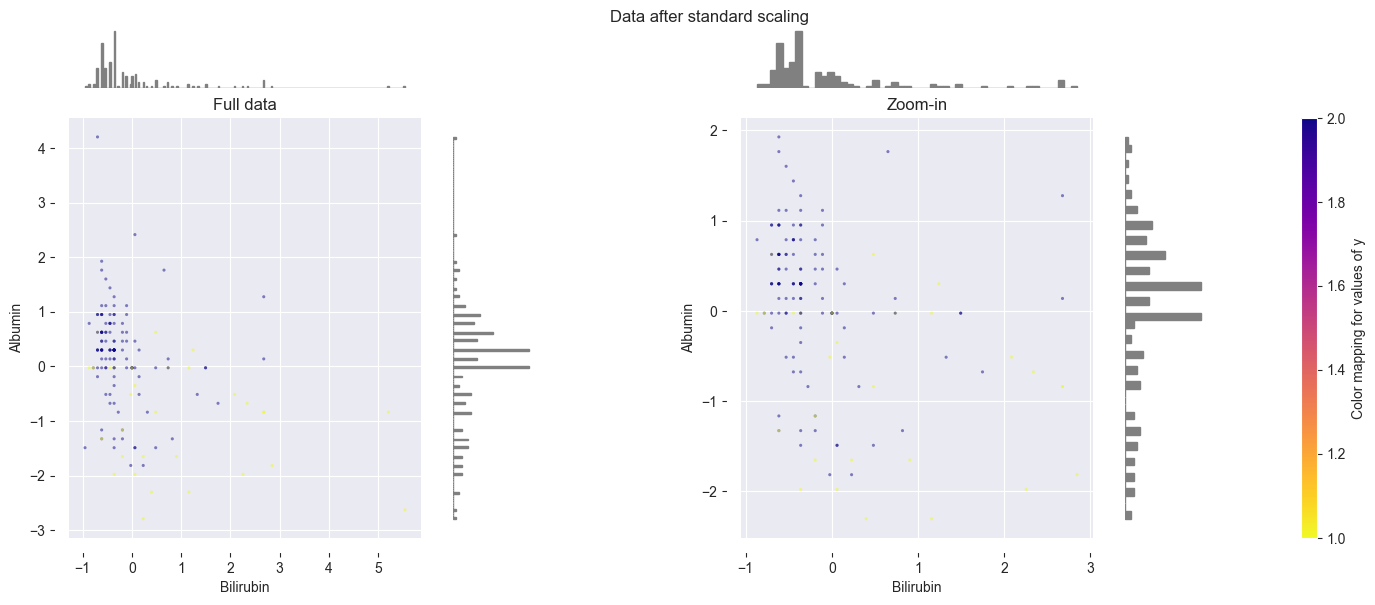

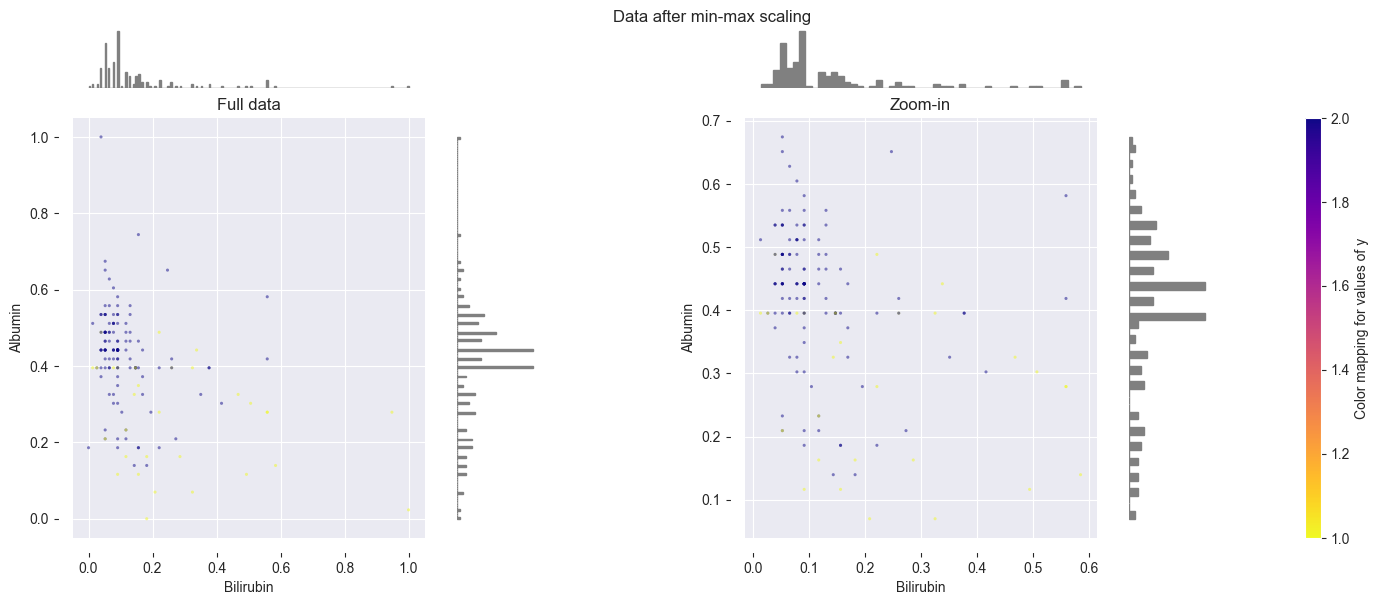

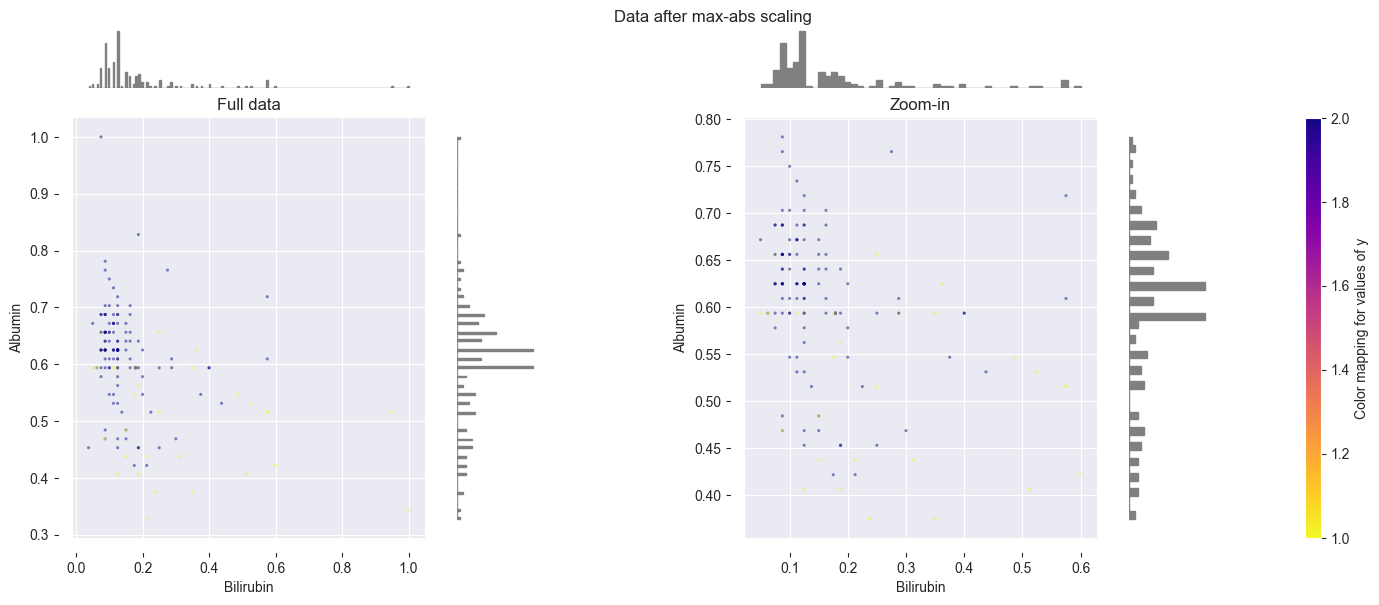

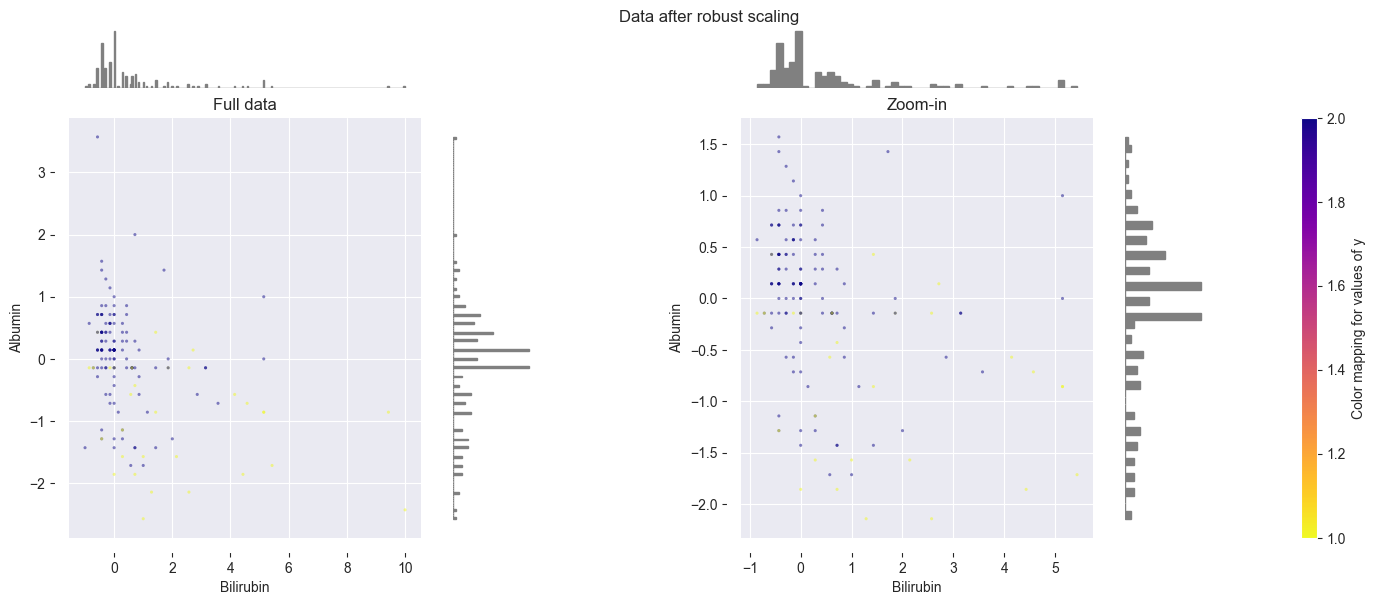

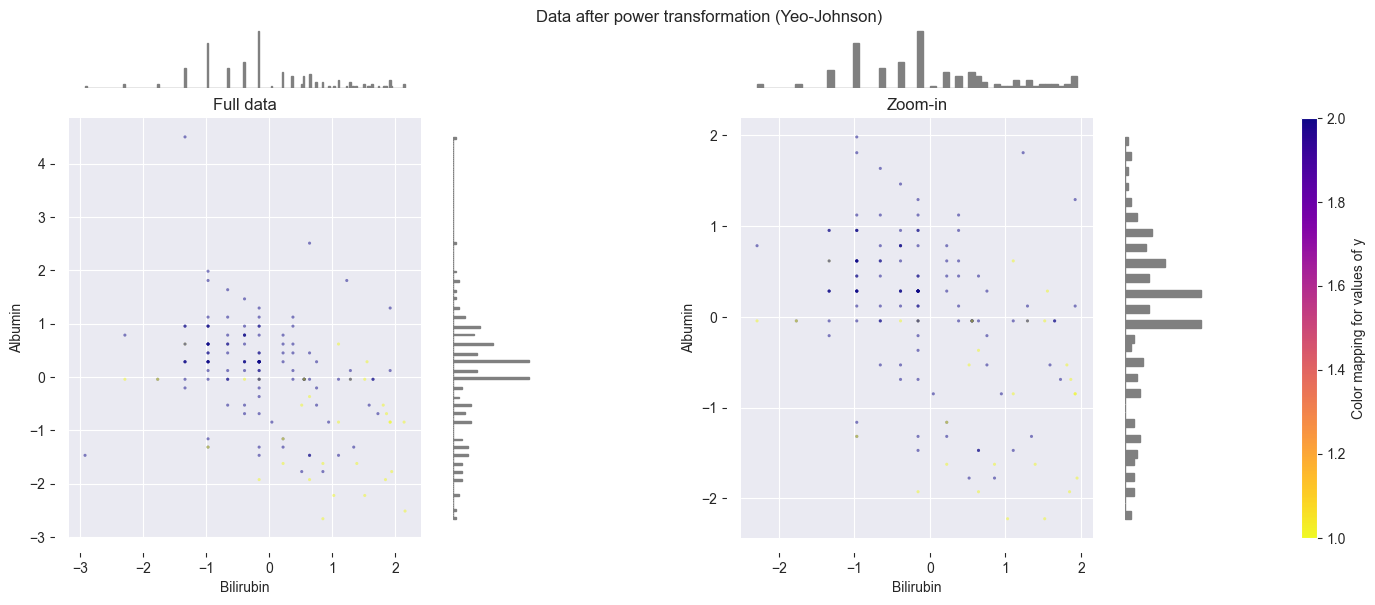

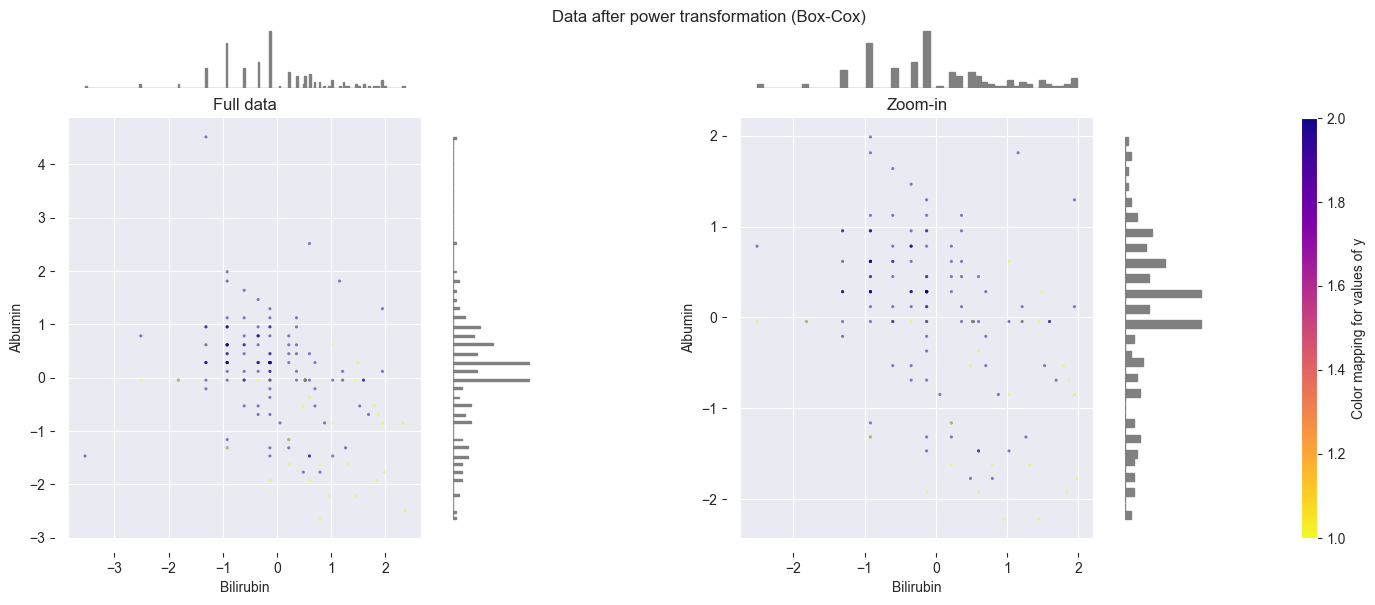

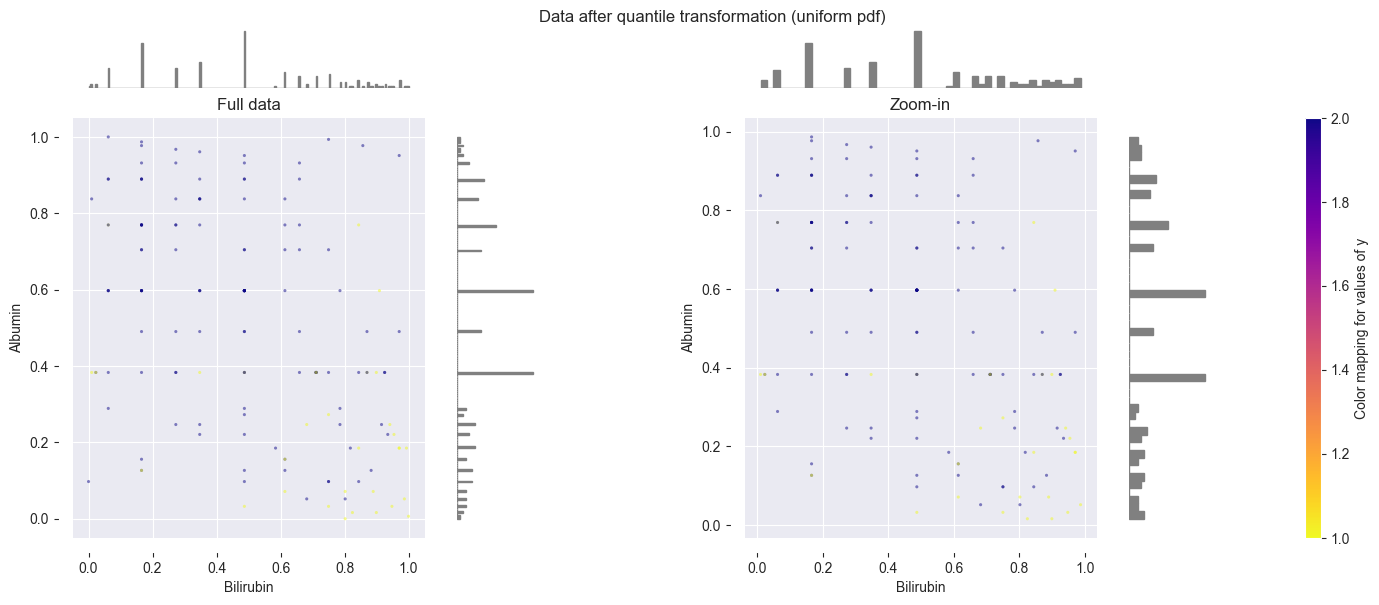

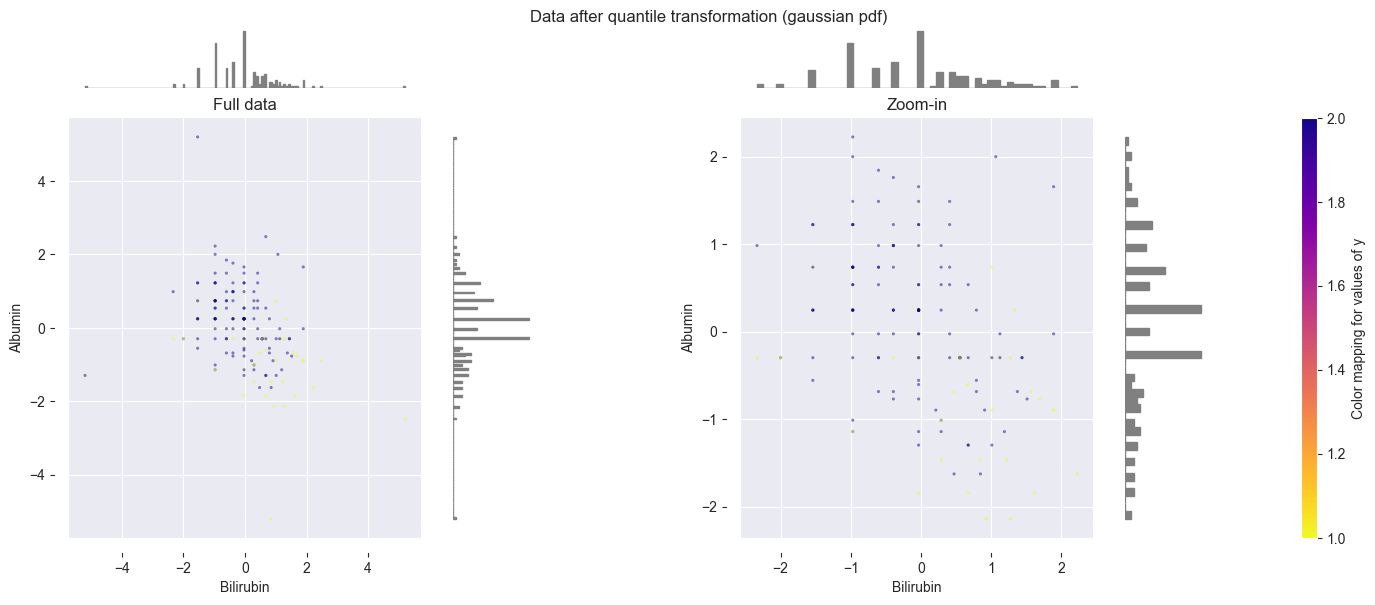

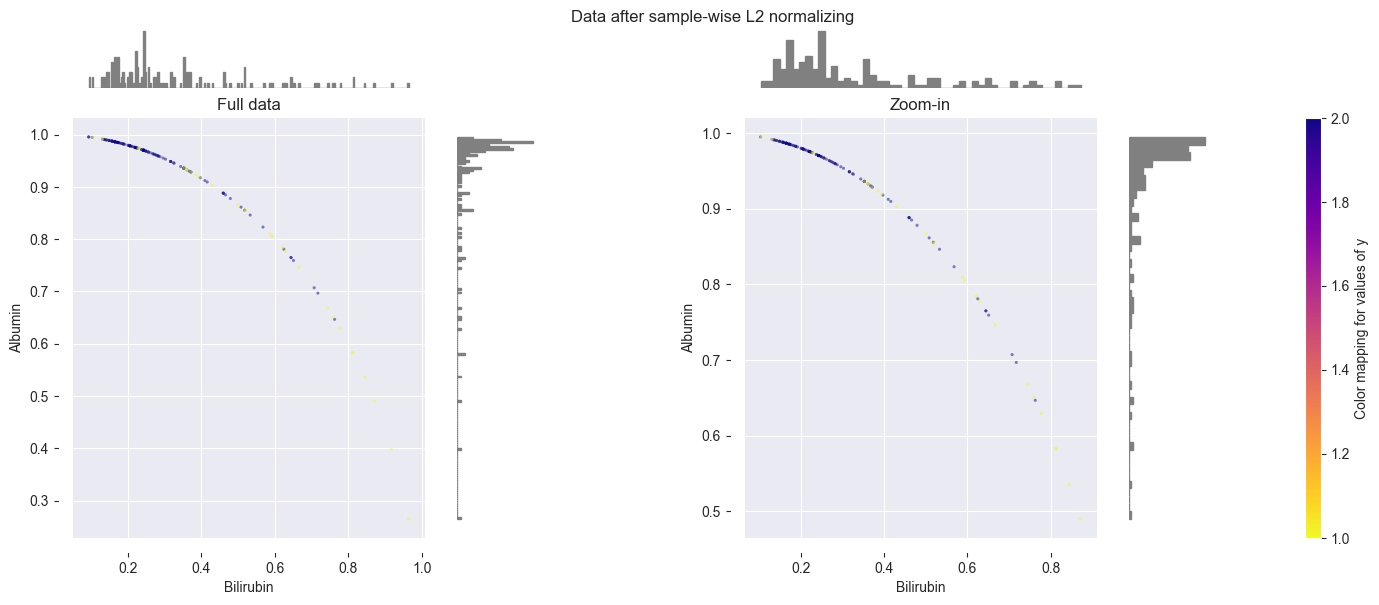

In [219]:
make_plot(1)
make_plot(2)
make_plot(3)
make_plot(4)
make_plot(5)
make_plot(6)
make_plot(7)
make_plot(8)
make_plot(9)